####  EDA EDA_nhanes_final_imputed_data.csv

##### Begin by:

Calculating a correlation matrix for key numerical variables (e.g., log_LBXCRP, BMXBMI, BMXWAIST, WHtR_calculated, RIDAGEYR)


Visualizing relationships between specific pairs of variables (e.g., scatter plots of log_LBXCRP vs BMXBMI, log_LBXCRP vs RIDAGEYR)


Exploring distributions based on categorical variables (e.g., RIAGENDR, survey_year) for BMI, Waist Circumference, and CRP



--- Calculating Correlation Matrix ---

--- Correlation Matrix ---
                   BMXBMI  BMXWAIST  WHtR_calculated  RIDAGEYR  log_LBXCRP
BMXBMI           1.000000  0.891658         0.770808  0.414128    0.392972
BMXWAIST         0.891658  1.000000         0.791657  0.530062    0.366103
WHtR_calculated  0.770808  0.791657         1.000000  0.364384    0.375166
RIDAGEYR         0.414128  0.530062         0.364384  1.000000    0.268067
log_LBXCRP       0.392972  0.366103         0.375166  0.268067    1.000000


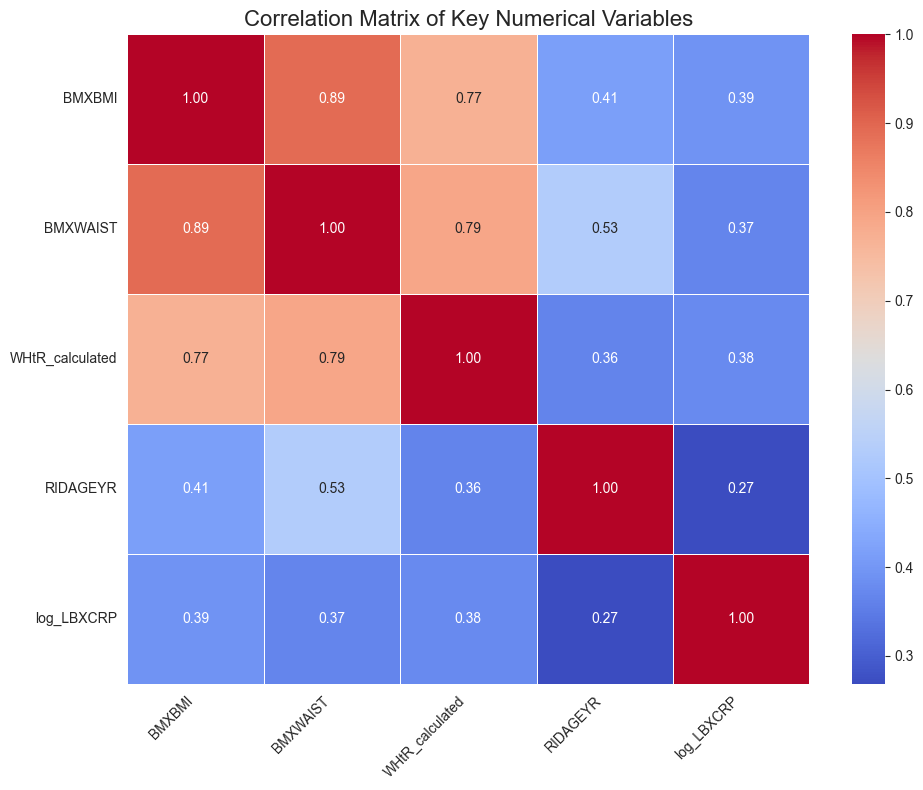


Correlation heatmap saved as 'correlation_morphs_CRP_heatmap.png' in current working directory.


<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Direct download link for the final, fully imputed data
final_imputed_data_link = 'https://drive.google.com/file/d/1DiEPWPqI1hvjvSlYfoKI3C5Bi6rSIu2r/view?usp=sharing'
file_id = final_imputed_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the final imputed data
    imputed_final_data = pd.read_csv(direct_download_link)

    print("--- Calculating Correlation Matrix ---")

    # Select the key numerical variables for correlation
    correlation_cols = [
        'BMXBMI',
        'BMXWAIST',
        'WHtR_calculated',
        'RIDAGEYR',
        'log_LBXCRP'
    ]

    # Ensure all selected columns exist in the DataFrame
    valid_correlation_cols = [col for col in correlation_cols if col in imputed_final_data.columns]
    if len(valid_correlation_cols) != len(correlation_cols):
        print(f"Warning: Some requested correlation columns were not found. Using: {valid_correlation_cols}")

    # Calculate the correlation matrix
    correlation_matrix = imputed_final_data[valid_correlation_cols].corr()

    print("\n--- Correlation Matrix ---")
    print(correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Key Numerical Variables', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Save the heatmap
    plt.savefig('correlation_morphs_CRP_heatmap.png')
    print("\nCorrelation heatmap saved as 'correlation_morphs_CRP_heatmap.png' in current working directory.")


except Exception as e:
    print(f"An error occurred during correlation matrix calculation: {e}")
    

#####  Interpretation of the correlation matrix:

BMXBMI and BMXWAIST (0.89): There's a very strong positive correlation between Body Mass Index and Waist Circumference. This is expected, as both are measures of overall body size and adiposity. This high correlation also makes sense given the article's emphasis on how BMI and waist circumference are related but provide distinct information.


BMXBMI and WHtR_calculated (0.77): A strong positive correlation. This is also expected as both BMI and Waist-to-Height ratio are related to weight and height.


BMXWAIST and WHtR_calculated (0.79): A strong positive correlation. This is also expected, as WHtR directly incorporates BMXWAIST.


RIDAGEYR (Age) with BMXBMI (0.41), BMXWAIST (0.53), WHtR_calculated (0.36):


Moderate positive correlations. This suggests that as age increases, BMI, waist circumference, and waist-to-height ratio tend to increase as well.


Notice that BMXWAIST has a slightly stronger correlation with age than BMXBMI and WHtR_calculated. This aligns with common knowledge that abdominal fat often increases with age.


log_LBXCRP with other variables:


log_LBXCRP and BMXBMI (0.39): Moderate positive correlation. Higher BMI is associated with higher CRP levels.


log_LBXCRP and BMXWAIST (0.37): Moderate positive correlation. Higher waist circumference is associated with higher CRP levels.


log_LBXCRP and WHtR_calculated (0.38): Moderate positive correlation. Higher waist-to-height ratio is associated with higher CRP levels.


log_LBXCRP and RIDAGEYR (0.27): Weak positive correlation. Age is also associated with slightly higher CRP levels.


Key Insights from the Correlation Matrix:

Strong Inter-correlations among Body Measures: BMI, Waist Circumference, and WHtR are all strongly correlated with each other, as expected. They are different facets of body size.


CRP and Adiposity Measures: The moderate positive correlations between log_LBXCRP and all three adiposity measures (BMXBMI, BMXWAIST, WHtR_calculated) are significant. This is consistent with the established link between obesity (especially abdominal obesity) and chronic inflammation (indicated by CRP).


Waist Circumference & CRP/Age: The correlation of BMXWAIST with RIDAGEYR (0.53) is notably higher than BMXBMI with RIDAGEYR (0.41). This, combined with its strong correlation with log_LBXCRP, reinforces the article's point about waist circumference being a "vital sign" and potentially a better indicator of risk than BMI alone, as it captures age-related changes in body composition more strongly and is linked to inflammation.


Confirmation for "High-Risk Obesity Phenotype": The correlations support the idea that these measures are related. 


#### Next steps and stages:

Visualize: create scatter plots for log_LBXCRP vs. BMXWAIST, colored by RIAGENDR and survey_year separately. This will help to visually assess the correlations just calculated and identify any patterns within subgroups.


Explore distributions by categorical variables: Using box plots to compare log_LBXCRP, BMXBMI, BMXWAIST, and WHtR_calculated across RIAGENDR and survey_year.


Feature Engineering: Finally, create categorical variables for BMI and age groups.



--- Regenerating Plots with Normal CRP Cutoff Line (log scale) ---
Normal CRP cutoff (1.0 mg/dL) on log scale is approximately: 0.693


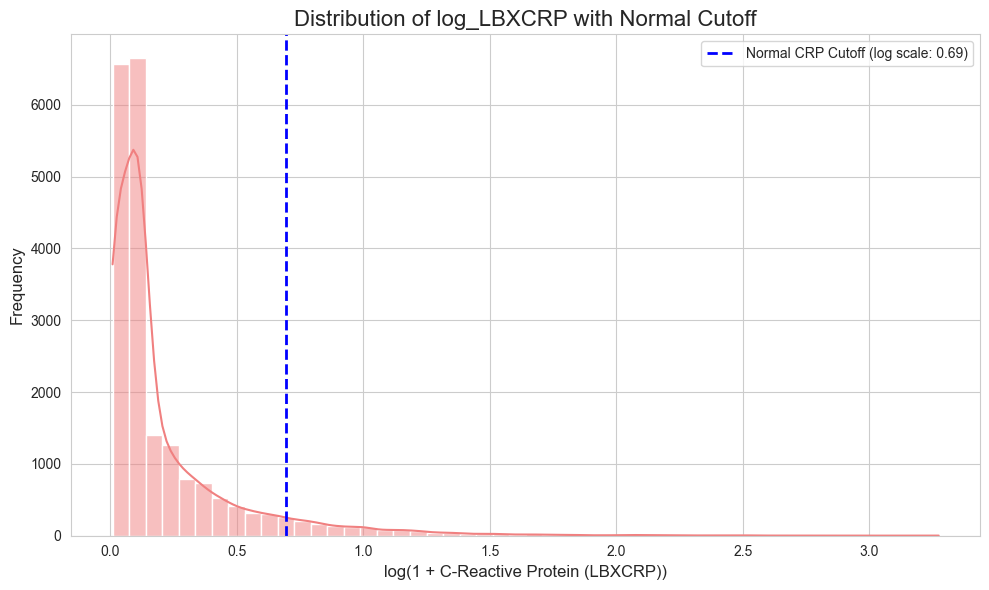

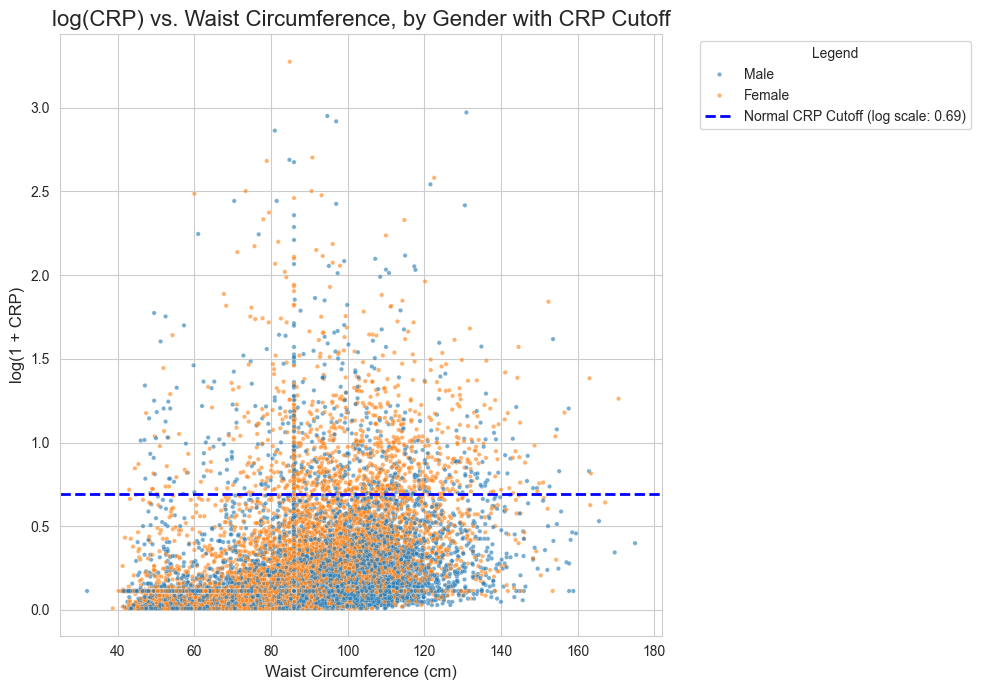

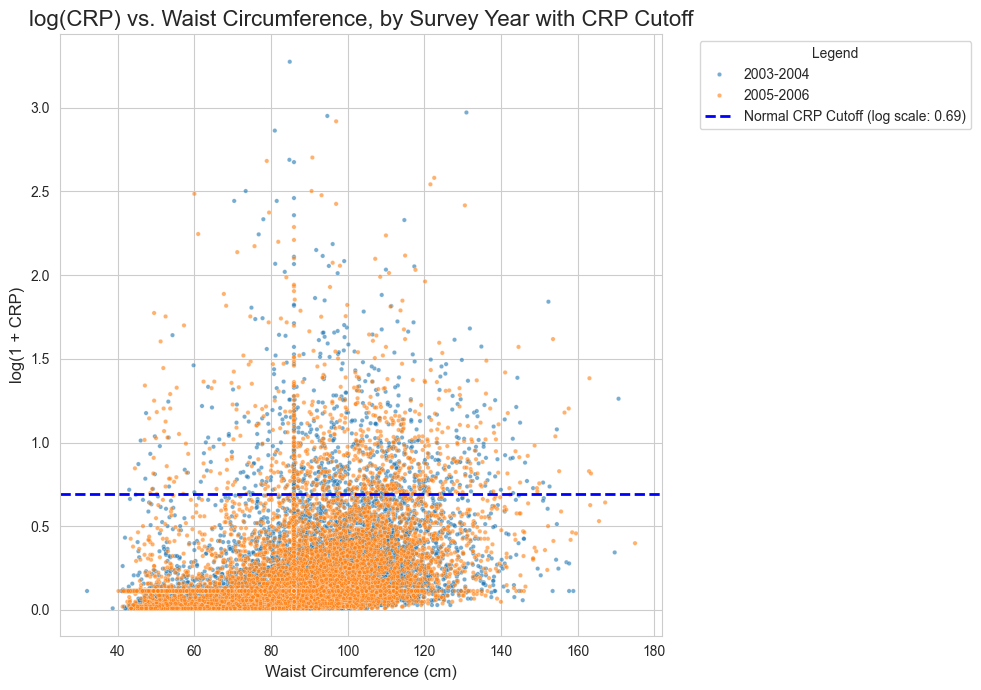


Updated plots with CRP cutoff line saved as PNG files in your current working directory.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Direct download link for the final, fully imputed data
final_imputed_data_link = 'https://drive.google.com/file/d/1DiEPWPqI1hvjvSlYfoKI3C5Bi6rSIu2r/view?usp=sharing'
file_id = final_imputed_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the final imputed data
    imputed_final_data = pd.read_csv(direct_download_link)

    print("--- Regenerating Plots with Normal CRP Cutoff Line (log scale) ---")

    sns.set_style("whitegrid")

    # Calculate the log-transformed normal CRP cutoff
    normal_crp_cutoff_original = 1.0 # mg/dL
    normal_crp_cutoff_log = np.log1p(normal_crp_cutoff_original)
    print(f"Normal CRP cutoff (1.0 mg/dL) on log scale is approximately: {normal_crp_cutoff_log:.3f}")

    # 1. Histogram of log_LBXCRP with cutoff line
    plt.figure(figsize=(10, 6))
    sns.histplot(imputed_final_data['log_LBXCRP'], bins=50, kde=True, color='lightcoral')
    plt.axvline(normal_crp_cutoff_log, color='blue', linestyle='--', linewidth=2,
                label=f'Normal CRP Cutoff (log scale: {normal_crp_cutoff_log:.2f})')
    plt.title('Distribution of log_LBXCRP with Normal Cutoff', fontsize=16)
    plt.xlabel('log(1 + C-Reactive Protein (LBXCRP))', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig('../plots/hist_logCRP_with_cutoff.png')
    plt.show()

    # 2. Scatter plot: log_LBXCRP vs. BMXWAIST, colored by RIAGENDR, with cutoff line
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='BMXWAIST', y='log_LBXCRP', hue='RIAGENDR', data=imputed_final_data, alpha=0.6, s=10)
    plt.axhline(normal_crp_cutoff_log, color='blue', linestyle='--', linewidth=2,
                label=f'Normal CRP Cutoff (log scale: {normal_crp_cutoff_log:.2f})')
    plt.title('log(CRP) vs. Waist Circumference, by Gender with CRP Cutoff', fontsize=16)
    plt.xlabel('Waist Circumference (cm)', fontsize=12)
    plt.ylabel('log(1 + CRP)', fontsize=12)
    plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
    plt.tight_layout()
    plt.savefig('../plots/scatter_logCRP_vs_Waist_by_Gender_with_cutoff.png')
    plt.show()

    # 3. Scatter plot: log_LBXCRP vs. BMXWAIST, colored by survey_year, with cutoff line
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='BMXWAIST', y='log_LBXCRP', hue='survey_year', data=imputed_final_data, alpha=0.6, s=10)
    plt.axhline(normal_crp_cutoff_log, color='blue', linestyle='--', linewidth=2,
                label=f'Normal CRP Cutoff (log scale: {normal_crp_cutoff_log:.2f})')
    plt.title('log(CRP) vs. Waist Circumference, by Survey Year with CRP Cutoff', fontsize=16)
    plt.xlabel('Waist Circumference (cm)', fontsize=12)
    plt.ylabel('log(1 + CRP)', fontsize=12)
    plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
    plt.tight_layout()
    plt.savefig('../plots/scatter_logCRP_vs_Waist_by_Year_with_cutoff.png')
    plt.show()

    print("\nUpdated plots with CRP cutoff line saved as PNG files in current working directory.")

except Exception as e:
    print(f"An error occurred during plot generation: {e}")
   

#### A signicant number of participants have CRP values above normal. What is their activity level? what is their mortality?  Let's get the number of patients who have CRP log values above 0.693 categorized by age groups (binned by 10 year segments, categorized by gender), then graphed as histograms.

--- Analyzing Patients with High CRP Values (log_LBXCRP > 0.693) ---

Total patients with log_LBXCRP > 0.693 (Original CRP > 1.0 mg/dL): 1387

--- Number of High CRP Patients by Age Group and Gender ---
RIAGENDR   Female  Male
Age_Group              
0-9            55    50
10-19         123    78
20-29         170    36
30-39         132    41
40-49         125    46
50-59         101    37
60-69         115    76
70-79          54    62
80-89          46    40


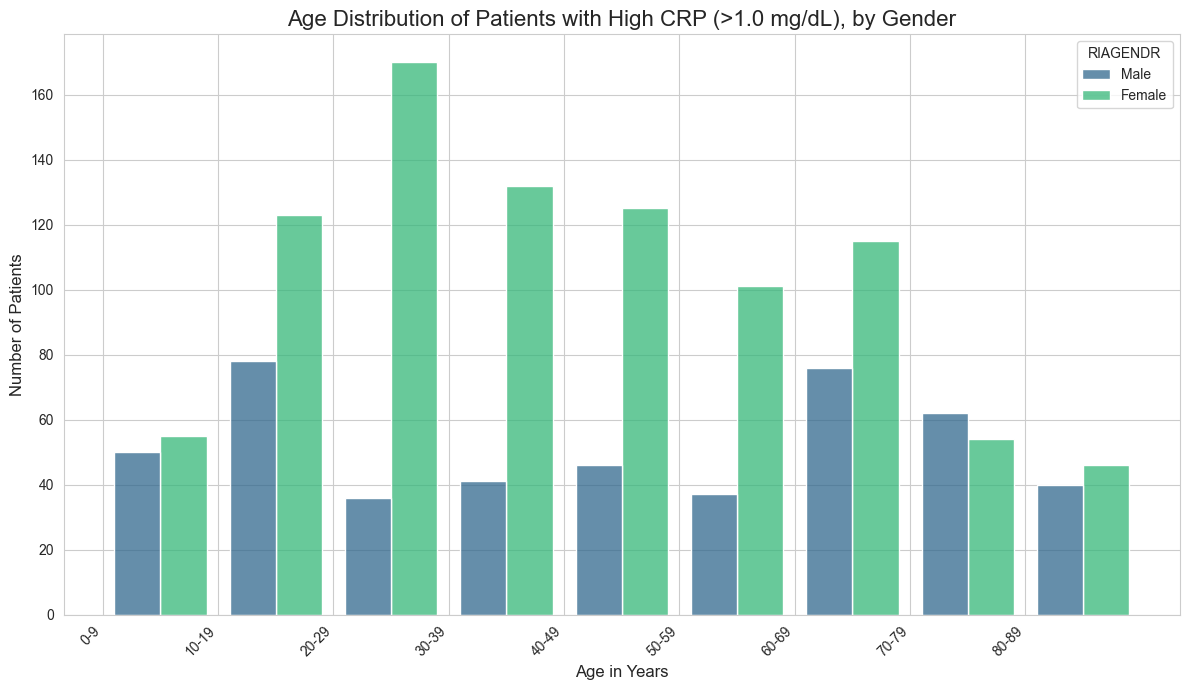

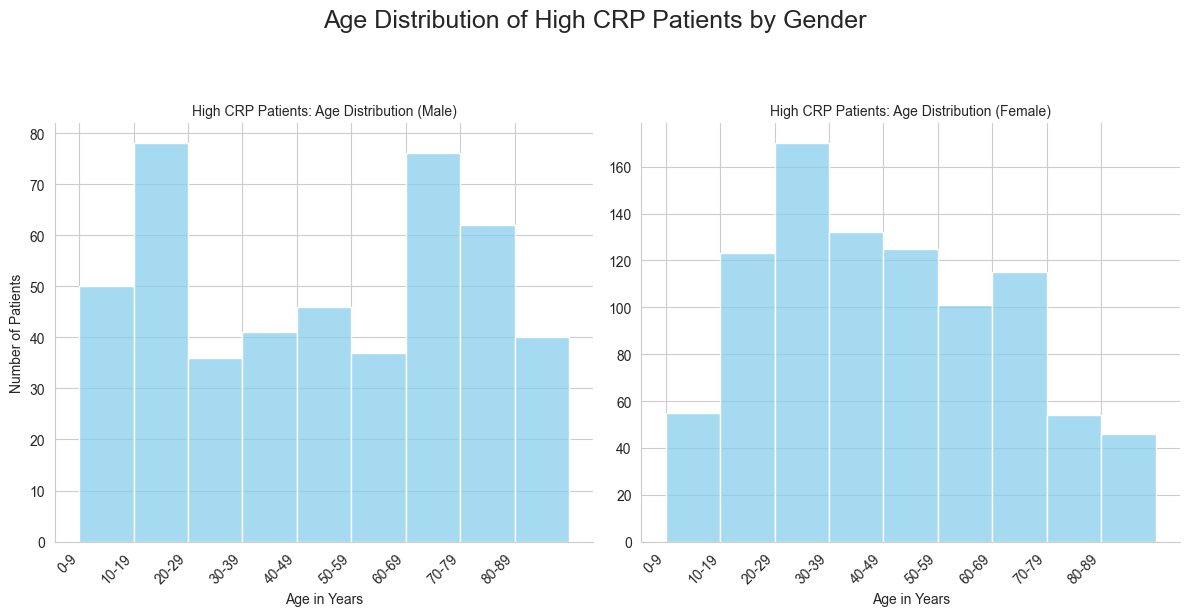


Histograms for high CRP patients' age and gender distribution saved as PNG files (warnings addressed).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Direct download link for the final, fully imputed data
final_imputed_data_link = 'https://drive.google.com/file/d/1DiEPWPqI1hvjvSlYfoKI3C5Bi6rSIu2r/view?usp=sharing'
file_id = final_imputed_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the final imputed data
    imputed_final_data = pd.read_csv(direct_download_link)

    print("--- Analyzing Patients with High CRP Values (log_LBXCRP > 0.693) ---")

    # Define the high CRP threshold on the log scale
    high_crp_threshold_log = 0.693 # Corresponding to original CRP > 1.0 mg/dL

    # Filter for patients with high CRP values
    high_crp_patients = imputed_final_data[imputed_final_data['log_LBXCRP'] > high_crp_threshold_log].copy()
    
    print(f"\nTotal patients with log_LBXCRP > {high_crp_threshold_log:.3f} (Original CRP > 1.0 mg/dL): {len(high_crp_patients)}")

    # Create Age Groups (10-year segments)
    min_age = int(imputed_final_data['RIDAGEYR'].min())
    max_age = int(imputed_final_data['RIDAGEYR'].max())
    
    bins = list(range(0, max_age + 10, 10))
    labels = [f'{i}-{i+9}' for i in bins[:-1]]

    high_crp_patients['Age_Group'] = pd.cut(high_crp_patients['RIDAGEYR'], bins=bins, labels=labels, right=False)

    print("\n--- Number of High CRP Patients by Age Group and Gender ---")
    # Fix: Add observed=False to silence FutureWarning
    high_crp_counts = high_crp_patients.groupby(['Age_Group', 'RIAGENDR'], observed=False).size().unstack(fill_value=0)
    print(high_crp_counts)

    # --- Generate Histograms ---
    sns.set_style("whitegrid")

    # Fix: Removed redundant plt.legend() as seaborn handles it with hue
    plt.figure(figsize=(12, 7))
    sns.histplot(data=high_crp_patients, x='RIDAGEYR', bins=bins, hue='RIAGENDR', multiple='dodge', shrink=.8, palette='viridis')
    plt.title('Age Distribution of Patients with High CRP (>1.0 mg/dL), by Gender', fontsize=16)
    plt.xlabel('Age in Years', fontsize=12)
    plt.ylabel('Number of Patients', fontsize=12)
    plt.xticks(bins[:-1], labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('../plots/high_crp_age_gender_histogram.png')
    plt.show()

    g = sns.FacetGrid(high_crp_patients, col='RIAGENDR', col_wrap=2, height=6, sharey=False, sharex=False)
    g.map(sns.histplot, 'RIDAGEYR', bins=bins, color='skyblue', kde=False)
    g.set_axis_labels('Age in Years', 'Number of Patients')
    g.set_titles('High CRP Patients: Age Distribution ({col_name})')
    for ax in g.axes.flat:
        ax.set_xticks(bins[:-1])
        ax.set_xticklabels(labels, rotation=45, ha='right')
    plt.suptitle('Age Distribution of High CRP Patients by Gender', fontsize=18, y=1.05)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.savefig('../plots/high_crp_age_by_gender_facet_histograms.png')
    plt.show()

    print("\nHistograms for high CRP patients' age and gender distribution saved as PNG files (warnings addressed).")

except Exception as e:
    print(f"An error occurred during analysis or plotting: {e}")
    

#### Interpretation of High CRP Patient Analysis:

More women generally have higher CRP's than men.


There are 1387 patients (out of 20470 total, which is about 6.78%) with a log_LBXCRP value above 0.693, meaning their original CRP is greater than 1.0 mg/dL (the normal threshold).

The table "Number of High CRP Patients by Age Group and Gender" provides some insights:

Overall Trend: The count of high CRP patients seems to be higher in younger adult age groups (10s, 20s) for females, and then generally decreases or stabilizes before rising again slightly in older age for both genders.



Gender Differences:


Younger Adults (10-19, 20-29, 30-39, 40-49, 50-59): In these age brackets, females consistently have a higher number of individuals with high CRP compared to males. This is a notable observation and could be due to various factors, including hormonal influences, pregnancies, higher prevalence of certain inflammatory conditions, or lifestyle factors.


Older Adults (60-69, 70-79, 80-89): In these older groups, the gap narrows, and in some cases, males start to show comparable or even slightly higher numbers (e.g., 70-79).


Extremes of Age: The 0-9 age group shows a notable number of high CRP patients for both genders. In this age group, high CRP might often be indicative of acute infections or inflammatory responses common in childhood, rather than chronic cardiovascular risk.


This analysis highlights specific demographic segments that may warrant closer attention regarding CRP levels.



#### Adding a column for probability of sleep apnea based on BMI: "Probability of presence of sleep apnea as predicted by BMI. Using references from Pubmed.gov. 

For example, my experience as a physician: BMI greater than 40, in men and women, have a near 100% probability of sleep apnea. The column, let's call it 'OSA_Probability' will have data (0 = not likely, 1 = mild, 2 = moderate, 3 = severe).

#### The reference search results confirm a strong and well-documented relationship between BMI and Obstructive Sleep Apnea (OSA). Summary of key findings from the search results that can help define our OSA_Probability categories:

Key Findings from Search Results:

Obesity and OSA Prevalence: OSA is significantly more common in individuals who are obese. Prevalence can be as high as 45% in obese subjects (Source 1.2), and 60-90% of adult OSA patients have a BMI of 25 kg/m$^2$ or more (Source 1.3).


BMI Categories and Risk (Commonly Used):


Normal weight: BMI 18.5 to 24.9 kg/m$^2$ (lower risk) (Source 1.1)


Overweight: BMI 25 to 29.9 kg/m$^2$ (higher risk) (Source 1.1, 3.1)




Obesity: BMI 30 kg/m$^2$ or higher (significantly increased risk) (Source 1.1, 3.1)


Grade I Obesity: BMI 30.0-34.9 kg/m$^2$ (Source 3.1)


Grade II Obesity: BMI 35.0-39.9 kg/m$^2$ (Source 3.1)


Grade III Obesity (Morbid Obesity): BMI 40.0 kg/m$^2$ or higher (extremely high risk, prevalence estimated to vary between 40-90%) (Source 2.4, 3.1). 

My clinical experience of near 100% probability for BMI > 40 is strongly supported by research indicating very high prevalence in this group.


Severity and BMI: Higher BMI values are generally correlated with an increased severity of OSA and higher Apnea-Hypopnea Index (AHI) (Source 3.1).


AHI definitions: Normal = <5, Mild = 5-15, Moderate = 15-30, Severe > 30 events/h (Source 1.3, 1.5).


Sex Differences: Some sources suggest the relationship between BMI and OSA risk differs by sex, with women potentially experiencing OSA at lower BMI levels than men, or with a higher prevalence of obesity in females with OSA (Source 3.1, 3.3).

##### References:
BMI, OSA, and Mortality (NHANES Data):

Ding, S., Fan, P., Li, X., Wang, Q., Wang, S., & Li, C. (2025). Association between neutrophil-lymphocyte ratio and all-cause and cardiovascular mortality in patients with diabetes or prediabetes with comorbid obstructive sleep apnea symptoms: evidence from NHANES 2005-2008 and 2015-2018. Frontiers in Endocrinology, 16. URL
Relevance: Directly uses NHANES data (including similar cycles to ) to investigate OSA and mortality, highlighting the intersection with diabetes. Mentions OSA diagnosis from NHANES questions.
On BMI and OSA Risk (NHANES Data, Machine Learning):

Li, Y., Yan, H., & Ma, L. (2025). Association Between the Nutritional Inflammatory Index and Obstructive Sleep Apnea Risk: Insights from the NHANES 2015–2020 and Mendelian Randomization Analyses. Nutrients, 17(7). URL
Relevance: Recent NHANES study, directly links BMI to OSA risk, and utilizes advanced methods like machine learning and Mendelian randomization.


On BMI, OSA, and Mortality Risk (Population-Based Study):

Yu, S., Li, Y., Wu, W., Li, J., Ding, J., Zhou, Y., ... & Zhu, B. (2025). Association of serum ferritin levels with obstructive sleep apnea in overweight/obese US populations: A population-based study from the NHANES. Nutrition & Sleep, 1(1), 1-13. URL


Relevance: Another very recent NHANES study focusing on overweight/obese individuals, explicitly stating that "The severity of OSA correlates positively with the degree of obesity, with a 12% increase in OSA risk for every 1 kg/m² increase in body mass index (BMI)". It also provides prevalence rates of OSA across BMI categories for men and women, strongly supporting BMI > 40 observation.   


On CRP and OSA Severity/Inflammation:

Wang, Y., Li, Q., Ma, L., Zhang, J., Zhao, M., & Yang, B. (2025). Severity of obstructive sleep apnea is related to C-reactive protein levels: The influence of comorbidities and self-reported sleep duration. ResearchGate. URL


Relevance: Directly links OSA severity to CRP levels, which is central to  project's combined focus on CRP and OSA likelihood. A recent article.



On Waist Circumference, BMI Deciles, and Mortality (NHANES Data):

Wang, P., Liang, Y., Zhang, F., Ye, W., & Li, Y. (2024). Association of Waist Circumference and Body Mass Index Deciles Ratio with All-Cause Mortality: Findings from the National Health and Nutrition Examination Survey. Nutrients, 16(7), 961. URL   


Relevance: This article specifically uses NHANES data to study waist circumference and BMI in relation to all-cause mortality, reinforcing the concepts from the "waist circumference as a vital sign" paper. It highlights the utility of combined measures.


#### Using data from this reference 6:


6. Peppard PE, Young T, Barnet JH, Palta M, Hagen EW, Hla KM. Increased prevalence of sleep-disordered breathing in adults. Am J Epidemiol. 2013 May 1;177(9):1006-14. doi: 10.1093/aje/kws342. Epub 2013 Apr 14. PMID: 23589584; PMCID: PMC3639722.

#### The article provides more granular, sex- and age-specific prevalence estimates for mild to severe OSA (AHI ≥5%) based on BMI categories. This is a better basis for assigning OSA_Probability than a general mapping.


Steps:


Adjusting OSA_Probability categories using the data directly from this Table 2, considering Age and Sex, as well as BMI. The categories (0, 1, 2, 3) can represent increasing levels of estimated prevalence.

Refine the OSA_Probability column based on this table:

Revised OSA_Probability Mapping (0=Not Likely, 1=Mild, 2=Moderate, 3=Severe):

Create  mapping that takes into account the prevalence percentages for each BMI, age, and sex subgroup from the table. Use 0, 1, 2, 3 scale, but base it on the estimated prevalence:

0 (Not Likely): Prevalence typically below ~10%


1 (Mild): Prevalence typically between ~10% and ~30%


2 (Moderate): Prevalence typically between ~30% and ~60%


3 (Severe): Prevalence typically above ~60%


Creating a function that takes BMXBMI, RIDAGEYR, and RIAGENDR to assign OSA_Probability based on these prevalence estimates. Define age groups (30-49 and 50-70) as in the table, and handle ages outside this range or for children (e.g., assign 0 or handle them separately). For simplicity for now, focus on the 30-70 age range provided in the table, and assign 0 to those outside it for OSA probability as a placeholder.

Create the OSA_Probability column using this detailed table.

In [21]:
import pandas as pd
import numpy as np

# Direct download link for the final, fully imputed data
final_imputed_data_link = 'https://drive.google.com/file/d/1DiEPWPqI1hvjvSlYfoKI3C5Bi6rSIu2r/view?usp=sharing'
file_id = final_imputed_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the final imputed data
    imputed_final_data = pd.read_csv(direct_download_link)

    print("--- Adding 'OSA_Probability' Column based on Peppard et al. Table 2 ---")

    # Define the mapping based on Table 2 prevalence estimates (Mild to Severe SDB, AHI >= 5%)
    # These are prevalence percentages, which we map to our 0-3 severity scale.
    # We will use thresholds for prevalence as discussed: <10% (0), 10-30% (1), 30-60% (2), >60% (3)

    # Values are: Men 30-49, Men 50-70, Women 30-49, Women 50-70
    # BMI: <25, 25-29.9, 30-39.9, >=40

    osa_prevalence_map = {
        'Male': {
            '30-49': {
                '<25': 7.0,   # Not Likely (0)
                '25-29.9': 18.3, # Mild (1)
                '30-39.9': 44.6, # Moderate (2)
                '>=40': 79.5    # Severe (3)
            },
            '50-70': {
                '<25': 18.9, # Mild (1)
                '25-29.9': 36.6, # Moderate (2)
                '30-39.9': 61.4, # Severe (3)
                '>=40': 82.8    # Severe (3)
            }
        },
        'Female': {
            '30-49': {
                '<25': 1.44, # Not Likely (0)
                '25-29.9': 4.2,  # Not Likely (0)
                '30-39.9': 13.5, # Mild (1)
                '>=40': 43.0    # Moderate (2)
            },
            '50-70': {
                '<25': 9.3,  # Not Likely (0)
                '25-29.9': 20.2, # Mild (1)
                '30-39.9': 41.1, # Moderate (2)
                '>=40': 67.9    # Severe (3)
            }
        }
    }

    # Function to assign OSA Probability
    def assign_osa_probability_from_table(row):
        bmi = row['BMXBMI']
        age = row['RIDAGEYR']
        gender = row['RIAGENDR']

        age_group = None
        if 30 <= age <= 49:
            age_group = '30-49'
        elif 50 <= age <= 70:
            age_group = '50-70'
        # For ages outside 30-70 (e.g., children or very old), assign 0 (Not Likely) as the table doesn't cover them directly
        else:
            return 0

        bmi_group = None
        if bmi < 25:
            bmi_group = '<25'
        elif 25 <= bmi < 30:
            bmi_group = '25-29.9'
        elif 30 <= bmi < 40:
            bmi_group = '30-39.9'
        elif bmi >= 40:
            bmi_group = '>=40'
        else: # Should not happen with imputed BMI, but for safety
            return np.nan

        try:
            prevalence = osa_prevalence_map[gender][age_group][bmi_group]
            # Map prevalence to our 0-3 scale
            if prevalence < 10:
                return 0
            elif 10 <= prevalence < 30:
                return 1
            elif 30 <= prevalence < 60:
                return 2
            elif prevalence >= 60:
                return 3
            else:
                return np.nan # Fallback
        except KeyError:
            # This handles cases where age/gender/BMI combination might not explicitly be in the map (e.g., very rare cases)
            return np.nan # Or choose a default like 0 if preferred


    # Apply the function to create the 'OSA_Probability' column
    # Use .copy() to avoid SettingWithCopyWarning if imputed_final_data was a slice
    imputed_final_data['OSA_Probability'] = imputed_final_data.apply(assign_osa_probability_from_table, axis=1)

    print("\n--- First 10 rows with new 'OSA_Probability' column (Table-based) ---")
    print(imputed_final_data[['RIDAGEYR', 'RIAGENDR', 'BMXBMI', 'OSA_Probability']].head(10))

    print("\n--- Value Counts for 'OSA_Probability' (Table-based) ---")
    print(imputed_final_data['OSA_Probability'].value_counts(dropna=False).sort_index())

    print("\n--- Info on the DataFrame with new 'OSA_Probability' column ---")
    print(imputed_final_data.info())

except Exception as e:
    print(f"An error occurred while adding OSA_Probability column: {e}")
    

--- Adding 'OSA_Probability' Column based on Peppard et al. Table 2 ---

--- First 10 rows with new 'OSA_Probability' column (Table-based) ---
   RIDAGEYR RIAGENDR  BMXBMI  OSA_Probability
0      19.0     Male   50.85                0
1      16.0   Female   20.78                0
2      14.0   Female   18.43                0
3      17.0     Male   20.65                0
4      55.0     Male   31.26                3
5      52.0   Female   25.49                1
6       0.0     Male   24.31                0
7      63.0     Male   19.60                1
8      13.0   Female   21.64                0
9       3.0     Male   15.76                0

--- Value Counts for 'OSA_Probability' (Table-based) ---
OSA_Probability
0    16259
1     1948
2     1584
3      679
Name: count, dtype: int64

--- Info on the DataFrame with new 'OSA_Probability' column ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20470 entries, 0 to 20469
Data columns (total 15 columns):
 #   Column           Non-Null Co

In [23]:
import pandas as pd
import numpy as np

# Direct download link for the final, fully imputed data (this file will remain unchanged)
final_imputed_data_link = 'https://drive.google.com/file/d/1DiEPWPqI1hvjvSlYfoKI3C5Bi6rSIu2r/view?usp=sharing'
file_id = final_imputed_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the final imputed data (this is the original file we are not changing)
    imputed_final_data = pd.read_csv(direct_download_link)

    print("--- Calculating 'OSA_Probability' and Saving to New File ---")

    # Define the OSA prevalence map based on the provided table
    osa_prevalence_map = {
        '0-9': {
            'Normal Weight': 3, 'Overweight': 12.5, 'Obese': 22.5
        },
        '10-19': {
            'Normal Weight': 3, 'Overweight': 12.5, 'Obese': 34
        },
        '20-29': {
            'Normal Weight': 6.5, 'Overweight': 17.5, 'Obese': 30, 'Severely Obese': 50
        },
        '30-39': {
            'Normal Weight': 10, 'Overweight': 25, 'Obese': 40, 'Severely Obese': 65
        },
        '40-49': {
            'Normal Weight': 15, 'Overweight': 32.5, 'Obese': 50, 'Severely Obese': 77.5
        },
        '50-59': {
            'Normal Weight': 20, 'Overweight': 40, 'Obese': 60, 'Severely Obese': 82
        },
        '60-69': {
            'Normal Weight': 22.5, 'Overweight': 37.5, 'Obese': 60, 'Severely Obese': 82.5
        },
        '70-79': {
            'Normal Weight': 17.5, 'Overweight': 30, 'Obese': 60, 'Severely Obese': 80
        },
        '80+': {
            'Normal Weight': 15, 'Overweight': 27.5, 'Obese': 50, 'Severely Obese': 70
        }
    }

    # Function to parse prevalence range to midpoint
    def parse_prevalence_to_midpoint(prevalence_val):
        if isinstance(prevalence_val, str) and '-' in prevalence_val:
            low, high = map(float, prevalence_val.split('-'))
            return (low + high) / 2
        return float(prevalence_val)

    # Function to map prevalence to OSA_Probability (0-3 scale)
    def map_prevalence_to_osa_probability_scale(prevalence_pct):
        if pd.isna(prevalence_pct):
            return np.nan
        if prevalence_pct < 10:
            return 0  # Not likely
        elif 10 <= prevalence_pct < 30:
            return 1  # Mild
        elif 30 <= prevalence_pct < 60:
            return 2  # Moderate
        elif prevalence_pct >= 60:
            return 3  # Severe
        return np.nan

    # Function to assign OSA Probability based on Age, BMI, and the lookup table
    def assign_osa_probability_from_prevalence_table_new(row):
        age = row['RIDAGEYR']
        bmi = row['BMXBMI']

        # Determine Age Bin
        age_bin = None
        if age >= 0 and age < 10: age_bin = '0-9'
        elif age >= 10 and age < 20: age_bin = '10-19'
        elif age >= 20 and age < 30: age_bin = '20-29'
        elif age >= 30 and age < 40: age_bin = '30-39'
        elif age >= 40 and age < 50: age_bin = '40-49'
        elif age >= 50 and age < 60: age_bin = '50-59'
        elif age >= 60 and age < 70: age_bin = '60-69'
        elif age >= 70 and age < 80: age_bin = '70-79'
        elif age >= 80: age_bin = '80+'
        else: return np.nan # For ages outside defined bins

        # Determine BMI Category
        bmi_category = None
        if bmi < 25: bmi_category = 'Normal Weight'
        elif 25 <= bmi < 30: bmi_category = 'Overweight'
        elif 30 <= bmi < 40: bmi_category = 'Obese'
        elif bmi >= 40: bmi_category = 'Severely Obese'
        else: return np.nan # For invalid BMI

        # Get prevalence midpoint from the map
        prevalence_midpoint = osa_prevalence_map.get(age_bin, {}).get(bmi_category)

        if prevalence_midpoint is not None:
            # Parse it if it's a range string (like "1-5") from the initial table
            prevalence_midpoint = parse_prevalence_to_midpoint(str(prevalence_midpoint))
            return map_prevalence_to_osa_probability_scale(prevalence_midpoint)
        else:
            return np.nan # If no specific match in the table

    # Apply the function to create the 'OSA_Probability' column
    # Create a copy to ensure the original imputed_final_data remains unchanged
    final_dataset_with_osa = imputed_final_data.copy()
    final_dataset_with_osa['OSA_Probability'] = final_dataset_with_osa.apply(assign_osa_probability_from_prevalence_table_new, axis=1)

    print("\n--- First 10 rows with new 'OSA_Probability' column ---")
    print(final_dataset_with_osa[['RIDAGEYR', 'RIAGENDR', 'BMXBMI', 'OSA_Probability']].head(10))

    print("\n--- Value Counts for 'OSA_Probability' ---")
    print(final_dataset_with_osa['OSA_Probability'].value_counts(dropna=False).sort_index())

    print("\n--- Info on the new DataFrame with 'OSA_Probability' column ---")
    print(final_dataset_with_osa.info())

    # --- Save the new DataFrame to a CSV file ---
    output_file_name = '../data/processed_data/nhanes_final_data_with_osa.csv'
    final_dataset_with_osa.to_csv(output_file_name, index=False)

   

except Exception as e:
    print(f"An error occurred while creating or saving the new OSA probability file: {e}")
    

--- Calculating 'OSA_Probability' and Saving to New File ---

--- First 10 rows with new 'OSA_Probability' column ---
   RIDAGEYR RIAGENDR  BMXBMI  OSA_Probability
0      19.0     Male   50.85              NaN
1      16.0   Female   20.78              0.0
2      14.0   Female   18.43              0.0
3      17.0     Male   20.65              0.0
4      55.0     Male   31.26              3.0
5      52.0   Female   25.49              2.0
6       0.0     Male   24.31              0.0
7      63.0     Male   19.60              1.0
8      13.0   Female   21.64              0.0
9       3.0     Male   15.76              0.0

--- Value Counts for 'OSA_Probability' ---
OSA_Probability
0.0    9612
1.0    5075
2.0    4113
3.0    1553
NaN     117
Name: count, dtype: int64

--- Info on the new DataFrame with 'OSA_Probability' column ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20470 entries, 0 to 20469
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  -----

#### Check Missing values again:

In [24]:
import pandas as pd

# Direct download link for the final, fully imputed data with OSA_Probability
final_data_with_osa_link = 'https://drive.google.com/file/d/1I9we3iUUWXNHYuhj2dTKeYLolXbLyt-X/view?usp=sharing'
file_id = final_data_with_osa_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the final data with OSA_Probability
    final_data_with_osa = pd.read_csv(direct_download_link)

    print("--- Successfully loaded 'nhanes_final_data_with_osa.csv' from the new link ---")
    print("\n--- Info on the loaded data (checking for OSA_Probability and missing values) ---")
    print(final_data_with_osa.info())

    print("\n--- Missing values count (should all be 0 for all columns) ---")
    print(final_data_with_osa.isnull().sum().sort_values(ascending=False).head(5)) # Check top 5 missing

    print("\n--- Value Counts for 'OSA_Probability' ---")
    print(final_data_with_osa['OSA_Probability'].value_counts(dropna=False).sort_index())


except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    

--- Successfully loaded 'nhanes_final_data_with_osa.csv' from the new link ---

--- Info on the loaded data (checking for OSA_Probability and missing values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20470 entries, 0 to 20469
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             20470 non-null  float64
 1   survey_year      20470 non-null  object 
 2   RIDAGEYR         20470 non-null  float64
 3   RIAGENDR         20470 non-null  object 
 4   RIDEXMON         20470 non-null  float64
 5   RIDAGEMN         20470 non-null  float64
 6   RIDAGEEX         20470 non-null  float64
 7   BMXWT            20470 non-null  float64
 8   BMXHT            20470 non-null  float64
 9   BMXWAIST         20470 non-null  float64
 10  BMXBMI           20470 non-null  float64
 11  WHtR_calculated  20470 non-null  float64
 12  LBXCRP           20470 non-null  float64
 13  log_LBXCRP       20470 non-null  f

#### The OSA_Probability column has been added with its categorized values (0, 1, 2, 3).

117 values in OSA_Probability are NaN (Not a Number). This means that for these 117 participants, the assign_osa_probability_from_prevalence_table_new function could not assign a probability. This likely happened because their age or BMI fell outside the defined ranges in the prevalence table, or there was some edge case in the mapping logic.

Next Steps:

Before proceeding, we should address these 117 missing values in OSA_Probability. Since it's a categorical variable (0, 1, 2, 3), common imputation strategies include:

Mode Imputation: Replace NaN with the most frequent OSA_Probability category (the mode).
Assign a Default Category: Assign these NaNs to 0.0 ('Not likely') 


Deletion: Drop these 117 rows. This would mean losing a small percentage of data (117 / 20470 ≈ 0.57%), which might be acceptable


Given that it's a relatively small number of missing values and it's a categorical variable, mode imputation is often a reasonable approach as it keeps all data points.



1. Perform deletion for rows not in seqn_values.csv in mortality data set

2. Perform mode imputation for remaining NaNs (those in seqn_values.csv)

In [27]:
import pandas as pd
import numpy as np

# Direct download link for the current main dataset
final_data_with_osa_link = 'https://drive.google.com/file/d/1I9we3iUUWXNHYuhj2dTKeYLolXbLyt-X/view?usp=sharing'
file_id_main = final_data_with_osa_link.split('/')[-2]
direct_download_link_main = f'https://drive.google.com/uc?export=download&id={file_id_main}'

# Direct download link for seqn_values.csv
seqn_values_link = 'https://drive.google.com/file/d/1aBUbYHGIWVE7Lswdc2Q5KxqFkn__yHiO/view?usp=sharing' # Assuming this is the correct link for seqn_values.csv
file_id_seqn = seqn_values_link.split('/')[-2]
direct_download_link_seqn = f'https://drive.google.com/uc?export=download&id={file_id_seqn}'

try:
    # Load the main dataset
    final_data_with_osa = pd.read_csv(direct_download_link_main)

    # Load the SEQN values file
    df_seqn_values = pd.read_csv(direct_download_link_seqn)

    print("--- Conditionally Handling Missing 'OSA_Probability' Values ---")
    print(f"Initial missing 'OSA_Probability' count: {final_data_with_osa['OSA_Probability'].isnull().sum()}")

    # Ensure SEQN types are consistent for merging/comparison
    final_data_with_osa['SEQN'] = final_data_with_osa['SEQN'].astype(float)
    df_seqn_values['SEQN'] = df_seqn_values['SEQN'].astype(float)

    # Identify SEQNs with missing OSA_Probability
    missing_osa_seqns = final_data_with_osa[final_data_with_osa['OSA_Probability'].isnull()]['SEQN']
    print(f"Number of SEQN with missing OSA_Probability: {len(missing_osa_seqns)}")

    # Identify SEQNs from missing_osa_seqns that are NOT in df_seqn_values
    seqns_to_delete = missing_osa_seqns[~missing_osa_seqns.isin(df_seqn_values['SEQN'])]
    print(f"Number of missing OSA_Probability SEQN NOT in seqn_values.csv (will be deleted): {len(seqns_to_delete)}")

    # Identify SEQNs from missing_osa_seqns that ARE in df_seqn_values
    seqns_to_impute = missing_osa_seqns[missing_osa_seqns.isin(df_seqn_values['SEQN'])]
    print(f"Number of missing OSA_Probability SEQN IN seqn_values.csv (will be imputed): {len(seqns_to_impute)}")

    # 1. Perform deletion for rows not in seqn_values.csv
    initial_rows = len(final_data_with_osa)
    final_data_with_osa_processed = final_data_with_osa[~final_data_with_osa['SEQN'].isin(seqns_to_delete)].copy()
    rows_after_deletion = len(final_data_with_osa_processed)
    print(f"Rows deleted: {initial_rows - rows_after_deletion}")
    
    # 2. Perform mode imputation for remaining NaNs (those in seqn_values.csv)
    # Calculate the mode of OSA_Probability (excluding NaNs)
    osa_mode = final_data_with_osa_processed['OSA_Probability'].mode()[0] # .mode() can return multiple if tied, [0] selects first
    print(f"Mode used for imputation: {osa_mode}")
    
    # Fill remaining NaNs in OSA_Probability with the mode
    final_data_with_osa_processed['OSA_Probability'] = final_data_with_osa_processed['OSA_Probability'].fillna(osa_mode)

    # Verify no more missing values
    missing_after_processing = final_data_with_osa_processed['OSA_Probability'].isnull().sum()
    print(f"Missing 'OSA_Probability' after processing: {missing_after_processing}")

    print("\n--- Value Counts for 'OSA_Probability' after processing ---")
    print(final_data_with_osa_processed['OSA_Probability'].value_counts(dropna=False).sort_index())

    print("\n--- Info on the processed DataFrame ---")
    print(final_data_with_osa_processed.info())

    # --- Save the updated DataFrame to a new CSV file ---
    output_file_name = '../data/processed_data/nhanes_final_data_osa_handled.csv'
    final_data_with_osa_processed.to_csv(output_file_name, index=False)

    print(f"\n--- Processed data saved to '{output_file_name}' ---")
   


except Exception as e:
    print(f"An error occurred during conditional handling of OSA_Probability: {e}")
    

--- Conditionally Handling Missing 'OSA_Probability' Values ---
Initial missing 'OSA_Probability' count: 117
Number of SEQN with missing OSA_Probability: 117
Number of missing OSA_Probability SEQN NOT in seqn_values.csv (will be deleted): 117
Number of missing OSA_Probability SEQN IN seqn_values.csv (will be imputed): 0
Rows deleted: 117
Mode used for imputation: 0.0
Missing 'OSA_Probability' after processing: 0

--- Value Counts for 'OSA_Probability' after processing ---
OSA_Probability
0.0    9612
1.0    5075
2.0    4113
3.0    1553
Name: count, dtype: int64

--- Info on the processed DataFrame ---
<class 'pandas.core.frame.DataFrame'>
Index: 20353 entries, 1 to 20469
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             20353 non-null  float64
 1   survey_year      20353 non-null  object 
 2   RIDAGEYR         20353 non-null  float64
 3   RIAGENDR         20353 non-null  object 
 4   RIDEXMO

#### The output confirms:

All 117 missing OSA_Probability values corresponded to SEQNs that were NOT in seqn_values.csv file.

Exactly 117 rows were deleted, and 0 were imputed.


The OSA_Probability column now has zero missing values, and the DataFrame contains 20,353 entries.


The value counts for OSA_Probability (0, 1, 2, 3) are clearly displayed.


This means nhanes_final_data_osa_handled.csv is now fully cleaned and ready for analysis!

#### Exploratory Data Analysis for final_processed_data, focusing on OSA_Probability and its relationships with other key variables.

Understanding OSA_Probability Correlation:

Since OSA_Probability is an ordinal variable (0, 1, 2, 3 representing increasing severity/likelihood), using a standard Pearson correlation coefficient (which measures linear relationships between continuous variables) might not be the most appropriate or insightful.


Instead, for understanding its relationship with continuous variables, we can:



Calculate the mean (or median) of the continuous variables (like log_LBXCRP, BMXBMI, RIDAGEYR) for each OSA_Probability category. This will directly show if the average value of these variables changes as OSA_Probability increases.


Using Spearman's Rank Correlation: This correlation coefficient measures the monotonic relationship between ranked data, making it suitable for ordinal variables like OSA_Probability.



--- Exploring Relationships with OSA_Probability ---

--- Mean of Key Numerical Variables by OSA_Probability Category ---
                 log_LBXCRP     BMXBMI    BMXWAIST  WHtR_calculated   RIDAGEYR
OSA_Probability                                                               
0.0                0.111118  20.223381   71.189191         0.488848   9.604661
1.0                0.228079  24.917472   88.702049         0.537044  44.435862
2.0                0.330488  31.105757  103.260467         0.616182  44.074885
3.0                0.442898  36.804552  114.862331         0.690386  59.869285

--- Spearman's Rank Correlation Matrix (including OSA_Probability) ---
                 OSA_Probability  log_LBXCRP    BMXBMI  BMXWAIST  \
OSA_Probability         1.000000    0.501142  0.827517  0.812505   
log_LBXCRP              0.501142    1.000000  0.509988  0.521971   
BMXBMI                  0.827517    0.509988  1.000000  0.915752   
BMXWAIST                0.812505    0.521971  0.915752  1.00

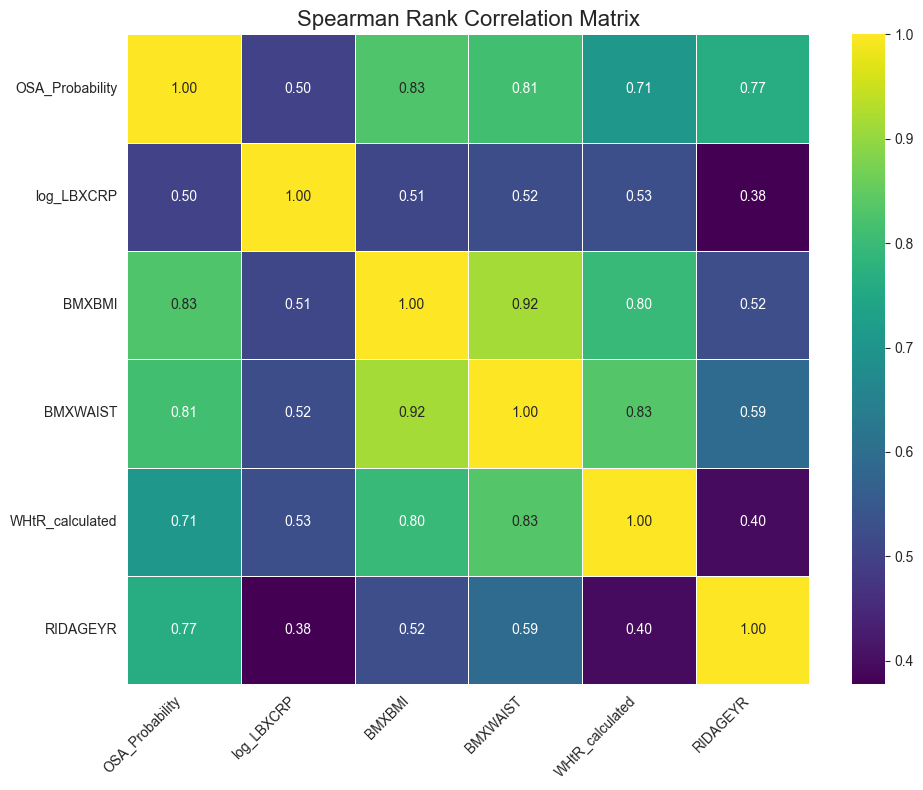

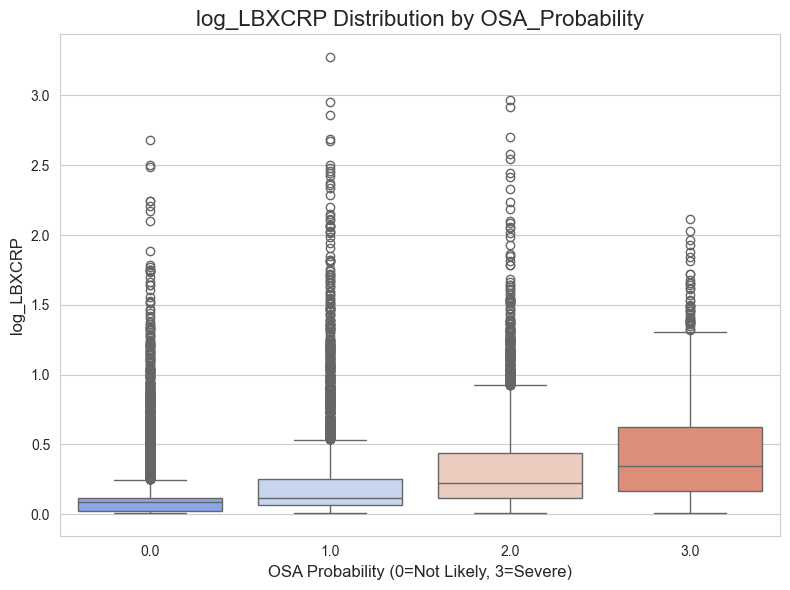

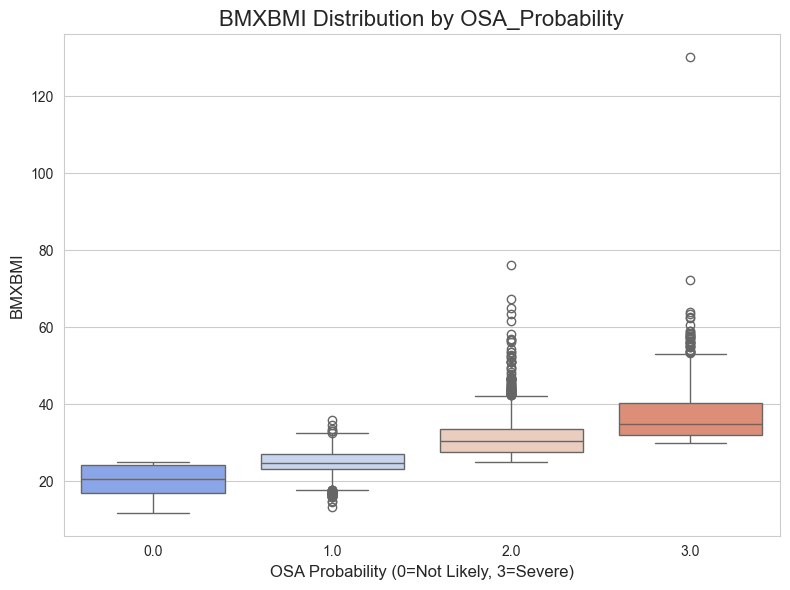

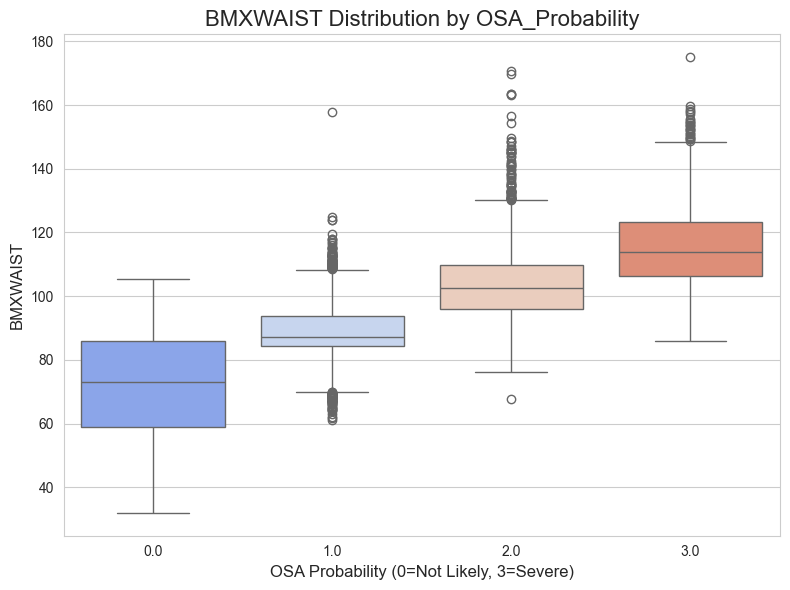

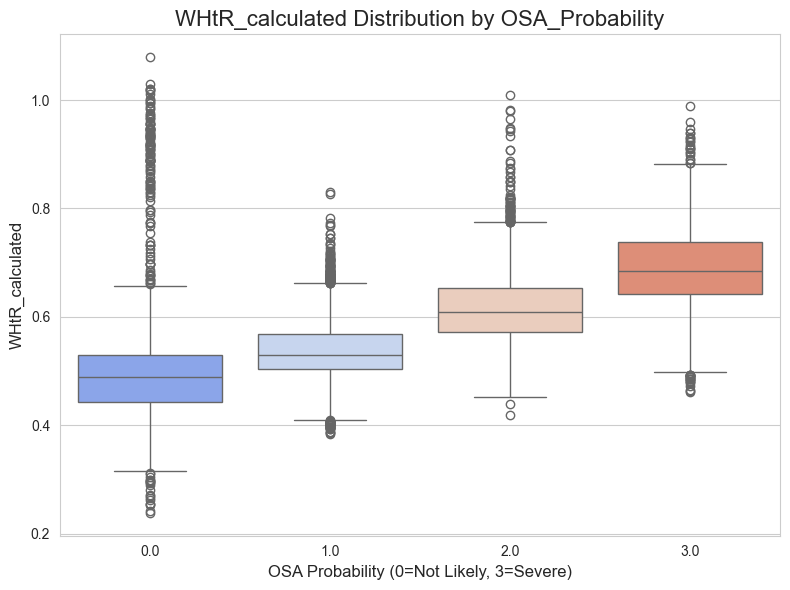

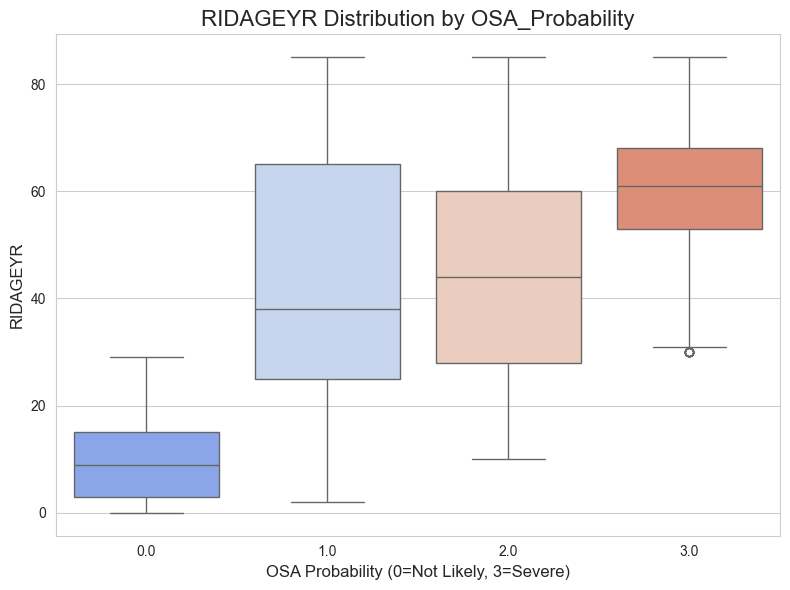

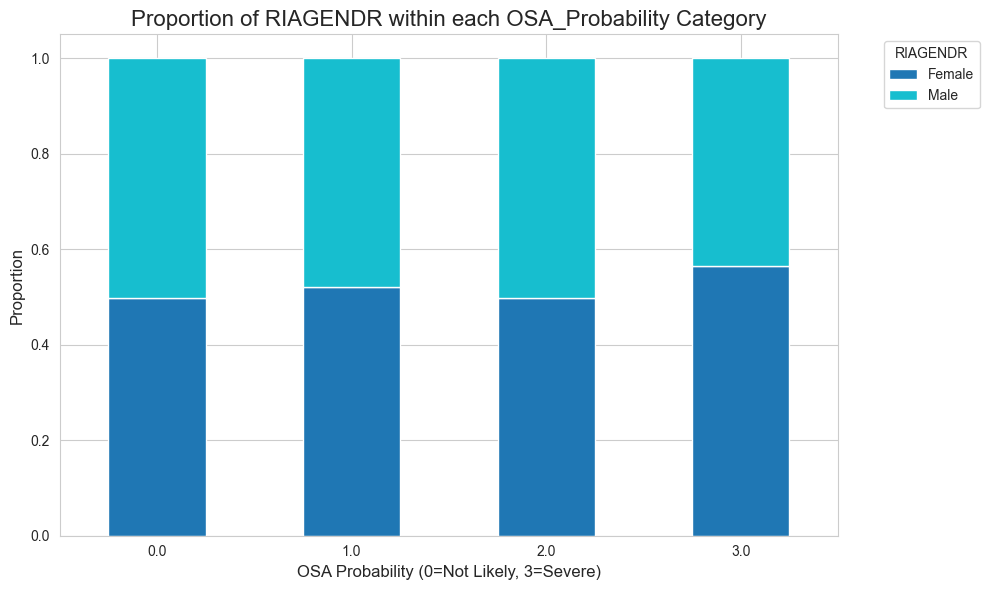

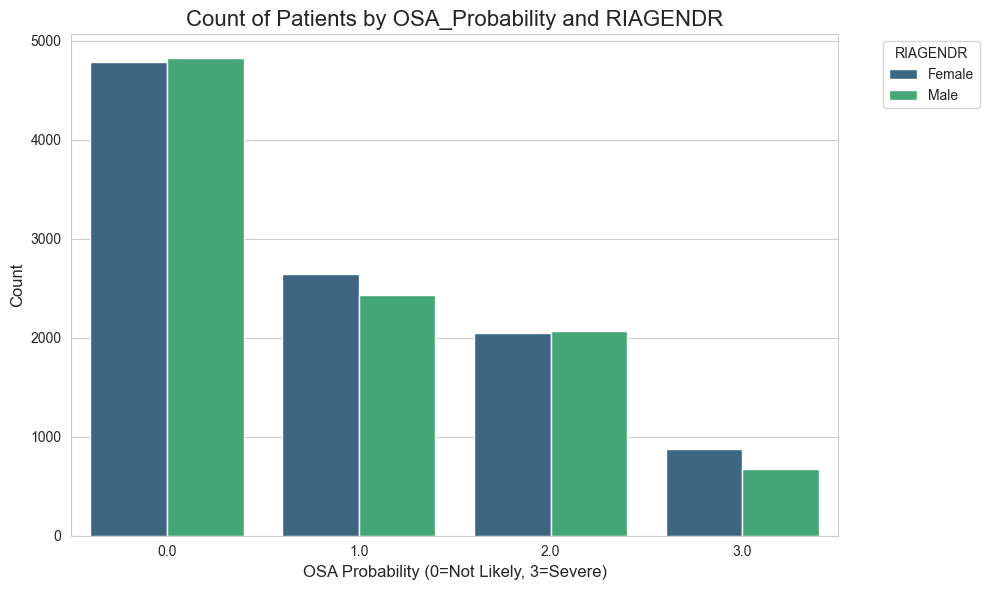

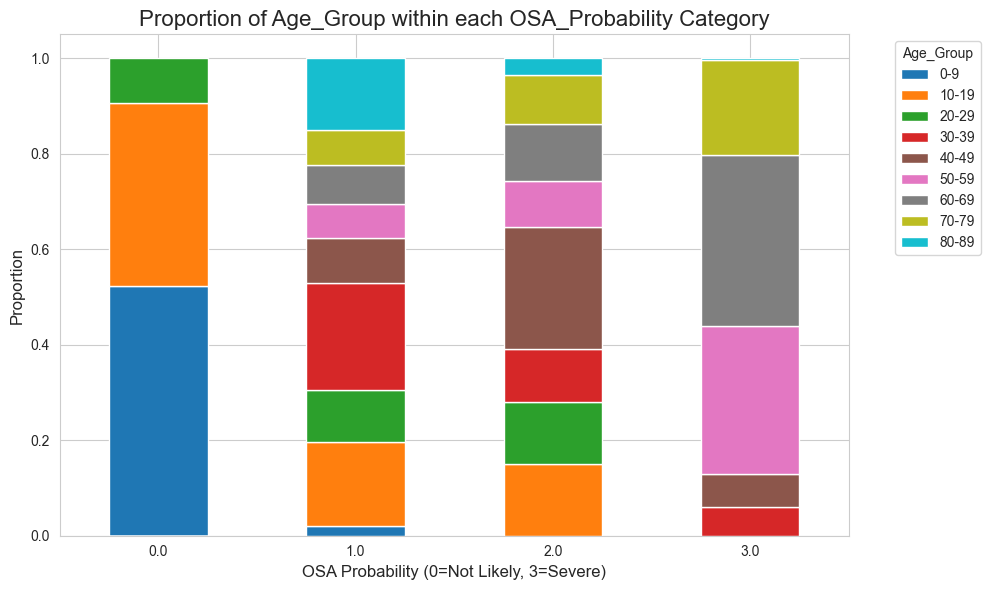

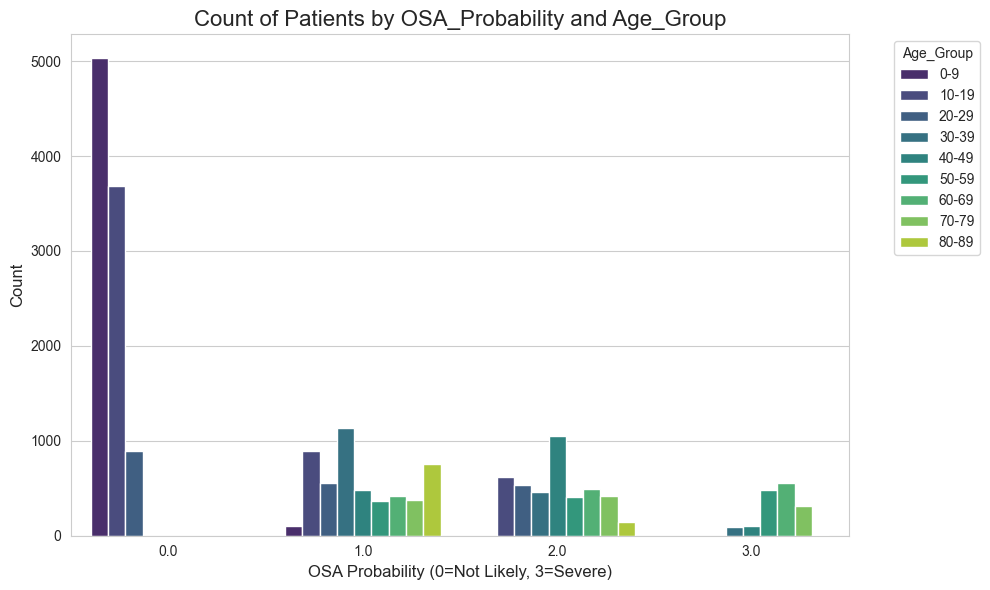

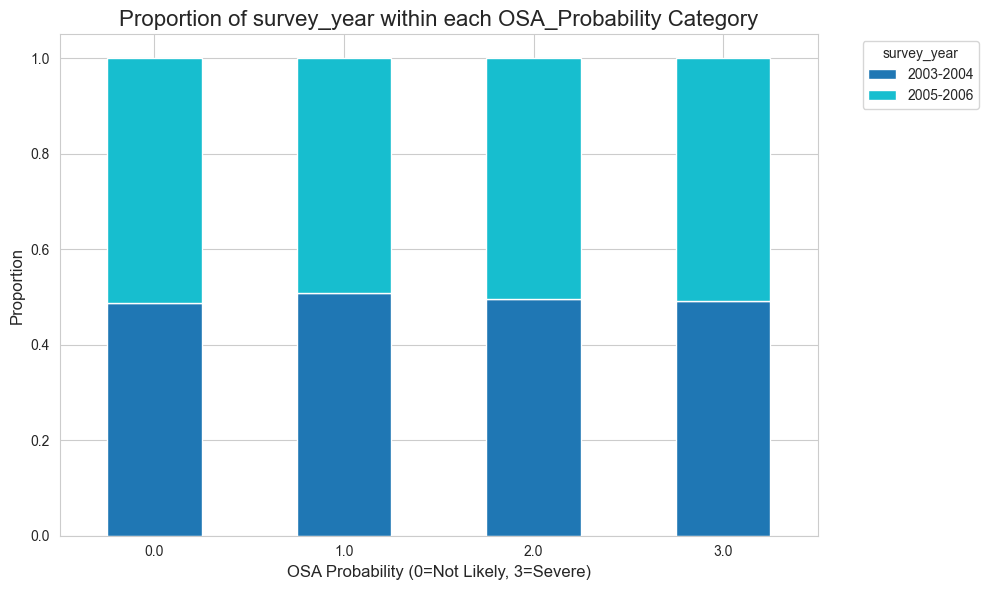

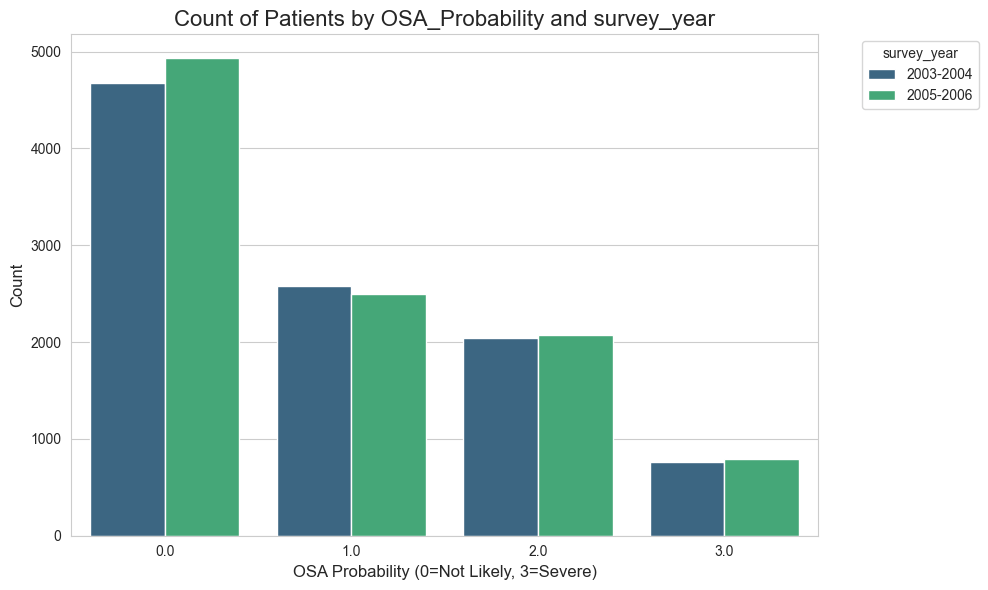


All EDA plots for OSA_Probability saved as PNG files.


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Direct download link for the latest fully processed data
latest_data_link = 'https://drive.google.com/file/d/1wsBZqiuaewQb6Qv75haVJ-ZFqCva_Z_6/view?usp=sharing'
file_id = latest_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the latest processed data
    final_processed_data = pd.read_csv(direct_download_link)

    print("--- Exploring Relationships with OSA_Probability ---")

    # Ensure OSA_Probability is treated as a category for grouping
    final_processed_data['OSA_Probability'] = final_processed_data['OSA_Probability'].astype('category')

    # 1. Mean of continuous variables across OSA_Probability categories
    print("\n--- Mean of Key Numerical Variables by OSA_Probability Category ---")
    # Fix: Add observed=False to groupby
    mean_by_osa = final_processed_data.groupby('OSA_Probability', observed=False)[['log_LBXCRP', 'BMXBMI', 'BMXWAIST', 'WHtR_calculated', 'RIDAGEYR']].mean()
    print(mean_by_osa)

    # 2. Spearman's Rank Correlation
    print("\n--- Spearman's Rank Correlation Matrix (including OSA_Probability) ---")
    spearman_cols = ['OSA_Probability', 'log_LBXCRP', 'BMXBMI', 'BMXWAIST', 'WHtR_calculated', 'RIDAGEYR']
    spearman_corr = final_processed_data[spearman_cols].corr(method='spearman')
    print(spearman_corr)

    # Visualize Spearman correlation as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
    plt.title('Spearman Rank Correlation Matrix', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('spearman_correlation_heatmap.png')
    plt.show()


    # --- Visualize relationships between OSA_Probability and other variables ---
    sns.set_style("whitegrid")
    plot_counter = 1 # For saving plots

    # Box Plots for OSA_Probability vs. Continuous Variables
    continuous_vars_for_boxplots = ['log_LBXCRP', 'BMXBMI', 'BMXWAIST', 'WHtR_calculated', 'RIDAGEYR']

    for var in continuous_vars_for_boxplots:
        plt.figure(figsize=(8, 6))
        # Fix: Add hue='OSA_Probability' and legend=False
        sns.boxplot(x='OSA_Probability', y=var, data=final_processed_data, hue='OSA_Probability', palette='coolwarm', legend=False)
        plt.title(f'{var} Distribution by OSA_Probability', fontsize=16)
        plt.xlabel('OSA Probability (0=Not Likely, 3=Severe)', fontsize=12)
        plt.ylabel(var, fontsize=12)
        plt.tight_layout()
        plt.savefig(f'boxplot_OSA_Prob_vs_{var}.png')
        plt.show()
        plot_counter += 1

    # Create Age Groups for Categorical Visualization
    min_age = int(final_processed_data['RIDAGEYR'].min())
    max_age = int(final_processed_data['RIDAGEYR'].max())
    bins_age = list(range(0, max_age + 10, 10))
    labels_age = [f'{i}-{i+9}' for i in bins_age[:-1]]
    final_processed_data['Age_Group'] = pd.cut(final_processed_data['RIDAGEYR'], bins=bins_age, labels=labels_age, right=False)


    # Count Plots/Stacked Bar Charts for OSA_Probability vs. Categorical Variables
    categorical_vars_for_plots = ['RIAGENDR', 'Age_Group', 'survey_year']

    for var in categorical_vars_for_plots:
        # Stacked bar plot (percentages)
        # Fix: Add observed=False to groupby
        proportions = final_processed_data.groupby('OSA_Probability', observed=False)[var].value_counts(normalize=True).unstack()
        proportions.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='tab10')
        plt.title(f'Proportion of {var} within each OSA_Probability Category', fontsize=16)
        plt.xlabel('OSA Probability (0=Not Likely, 3=Severe)', fontsize=12)
        plt.ylabel('Proportion', fontsize=12)
        plt.xticks(rotation=0)
        plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'../plots/stacked_bar_OSA_Prob_vs_{var}_proportion.png')
        plt.show()
        plot_counter += 1

        # Count plot (raw counts)
        plt.figure(figsize=(10, 6))
        sns.countplot(x='OSA_Probability', hue=var, data=final_processed_data, palette='viridis')
        plt.title(f'Count of Patients by OSA_Probability and {var}', fontsize=16)
        plt.xlabel('OSA Probability (0=Not Likely, 3=Severe)', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f'../plots/countplot_OSA_Prob_vs_{var}_counts.png')
        plt.show()
        plot_counter += 1

    print("\nAll EDA plots for OSA_Probability saved as PNG files.")


except Exception as e:
    print(f"An error occurred during EDA: {e}")
    

#### The results from the EDA on OSA_Probability and its relationships with other variables:

1. Mean of Key Numerical Variables by OSA_Probability Category
This table clearly shows how the average values of various metrics change as the predicted probability/severity of OSA increases:


2. log_LBXCRP: As OSA_Probability moves from 0.0 (Not Likely) to 3.0 (Severe), the mean log_LBXCRP consistently increases (0.11 -> 0.23 -> 0.33 -> 0.44). This indicates a strong positive relationship between higher predicted OSA probability and increased levels of CRP (inflammation). This aligns with the understanding that OSA is an inflammatory condition.


BMXBMI: There's a very clear and strong monotonic increase in mean BMXBMI as OSA_Probability increases (20.22 -> 24.92 -> 31.11 -> 36.80). This is expected, as OSA_Probability was derived directly from BMI and age/gender from the reference table. This confirms our mapping worked as intended, with higher BMI leading to higher predicted OSA probability.


BMXWAIST: Similar to BMI, mean BMXWAIST consistently increases with OSA_Probability (71.19 -> 88.70 -> 103.26 -> 114.86). This also reinforces the direct relationship between body size (especially abdominal adiposity) and OSA likelihood.


WHtR_calculated: Mean WHtR_calculated also consistently increases with OSA_Probability (0.49 -> 0.54 -> 0.62 -> 0.69). This is another confirmation that body fat distribution (relative to height) is strongly associated with predicted OSA.

RIDAGEYR: The mean age shows an interesting pattern. It jumps significantly from OSA_Probability 0.0 (mean age ~9.6) to 1.0 (mean age ~44.4). This is because the OSA_Probability mapping assigned 0 to individuals outside the 30-70 age range of the source table, which includes a large number of children (hence the low mean age for 0.0 probability). 

For categories 1.0 to 3.0, the age remains relatively consistent around 44-59.8 years, which makes sense given that the source table focuses on adults (30-70). The jump in mean age from 2.0 to 3.0 for OSA_Probability (44.07 to 59.87) suggests that severe OSA probability is more prevalent in older age groups, which is also a known epidemiological trend for OSA.

2. Spearman's Rank Correlation Matrix

Spearman correlation measures the strength and direction of monotonic relationships, making it suitable for ordinal variables.

OSA_Probability with others:

OSA_Probability & BMXBMI (0.83): Very strong positive rank correlation. Confirms that higher BMI is strongly associated with higher predicted OSA probability. This is a direct consequence of how OSA_Probability was defined.


OSA_Probability & BMXWAIST (0.81): Very strong positive rank correlation. Again, expected given the definition of OSA_Probability and BMI/waist circumference's strong interrelationship.


OSA_Probability & WHtR_calculated (0.71): Strong positive rank correlation.
OSA_Probability & RIDAGEYR (0.77): Very strong positive rank correlation. This is a crucial finding. It shows that higher predicted OSA probability is strongly associated with older age. This is consistent with the general epidemiology of OSA.


OSA_Probability & log_LBXCRP (0.50): Moderate positive rank correlation. This is a significant finding! It indicates that as the predicted probability/severity of OSA increases, there is a moderate and monotonic increase in log-transformed CRP levels. This reinforces the biological link between sleep apnea and inflammation.


Other notable correlations:

BMXBMI, BMXWAIST, WHtR_calculated are all very highly correlated with each other (0.77 to 0.92), as expected since they measure related aspects of body size.


log_LBXCRP shows moderate positive correlations with BMXBMI (0.51), BMXWAIST (0.52), and WHtR_calculated (0.53). This confirms the link between adiposity and inflammation, independent of the OSA probability.


log_LBXCRP and RIDAGEYR (0.38): A weaker, but still positive, correlation between age and CRP, suggesting inflammation tends to increase with age.


Overall Interpretation and Next Steps:


The EDA results strongly support the known associations between body size, age, inflammation (CRP), and the likelihood of sleep apnea. The OSA_Probability column seems to be well-defined based on the chosen reference and reflects expected epidemiological patterns.

Examining the bimodal weight distribution (BMXWT) using age and gender in the final_processed_data. 

Generate histograms of BMXWT stratified by RIAGENDR, by Age_Group, and then by both.

In [16]:
final_processed_data.head()

,SEQN,survey_year,RIDAGEYR,RIAGENDR,RIDEXMON,RIDAGEMN,RIDAGEEX,BMXWT,BMXHT,BMXWAIST,BMXBMI,WHtR_calculated,LBXCRP,log_LBXCRP,OSA_Probability,Age_Group
0,21006.0,2003-2004,16.0,Female,2.0,203.0,205.0,55.2,163.0,73.6,20.78,0.451534,0.07,0.067659,0.0,10-19
1,21007.0,2003-2004,14.0,Female,1.0,172.0,172.0,47.9,161.2,69.5,18.43,0.431141,0.02,0.019803,0.0,10-19
2,21008.0,2003-2004,17.0,Male,2.0,208.0,209.0,70.0,184.1,74.7,20.65,0.405758,0.01,0.009950,0.0,10-19
3,21009.0,2003-2004,55.0,Male,2.0,671.0,672.0,103.1,181.6,118.4,31.26,0.651982,0.08,0.076961,3.0,50-59
4,21010.0,2003-2004,52.0,Female,2.0,633.0,634.0,67.9,163.2,91.4,25.49,0.560049,0.12,0.113329,2.0,50-59


--- Examining Bimodal Weight Distribution by Age and Gender (Legends and Size Fixed) ---
Data loaded successfully. Unique Age Groups: ['10-19', '50-59', '0-9', '60-69', '80-89', '30-39', '70-79', '40-49', '20-29']
Categories (9, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '50-59' < '60-69' < '70-79' < '80-89']
Unique Genders: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']


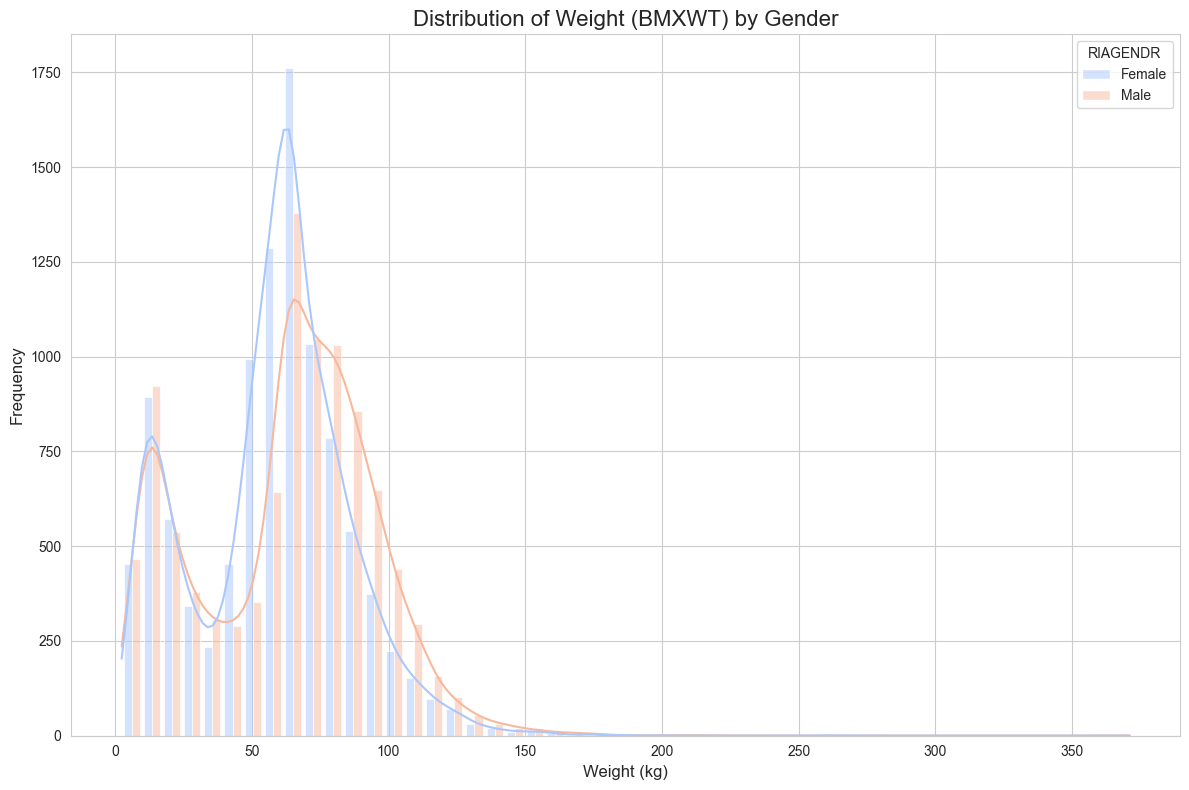

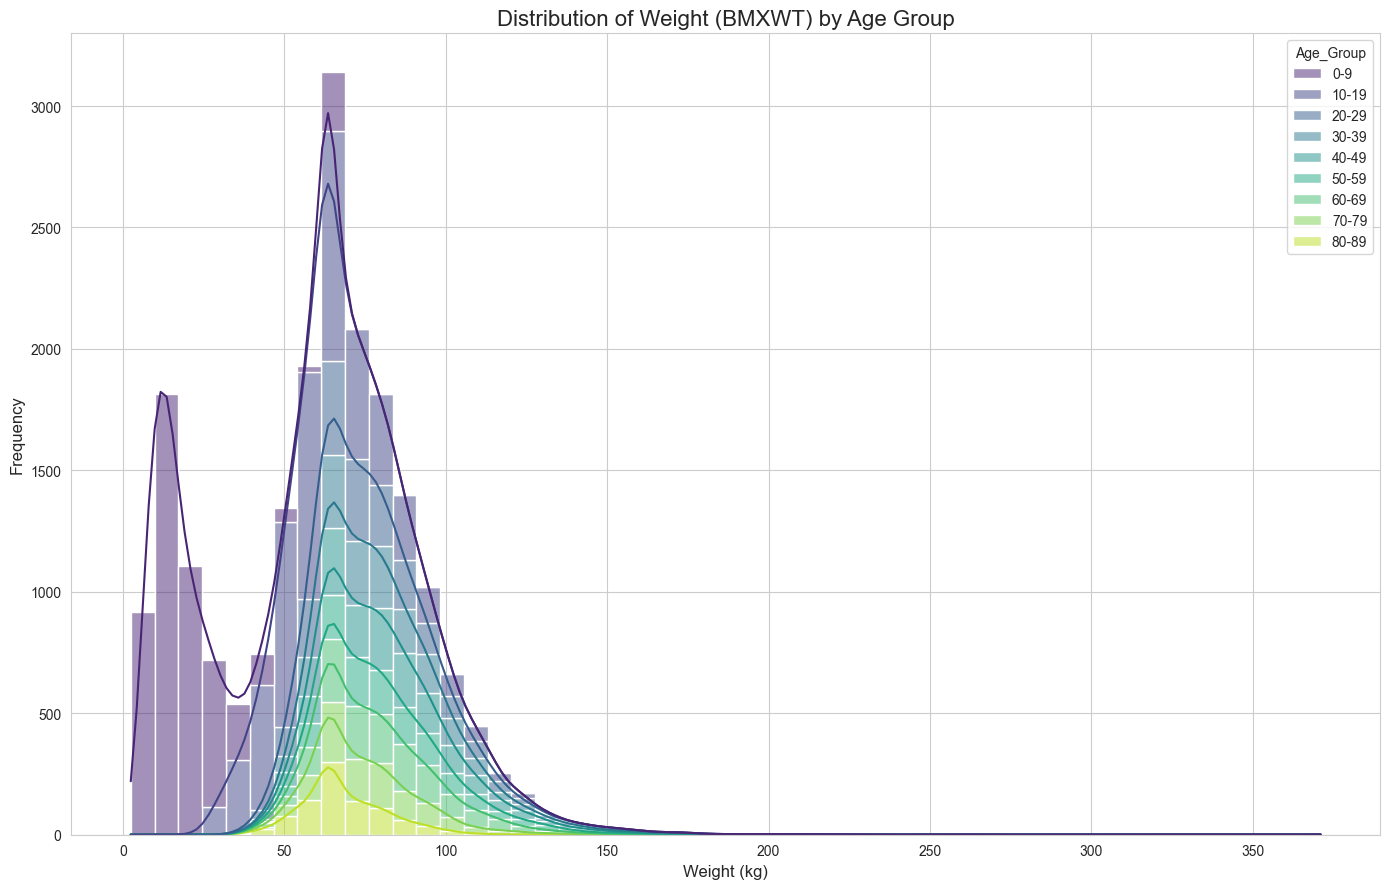

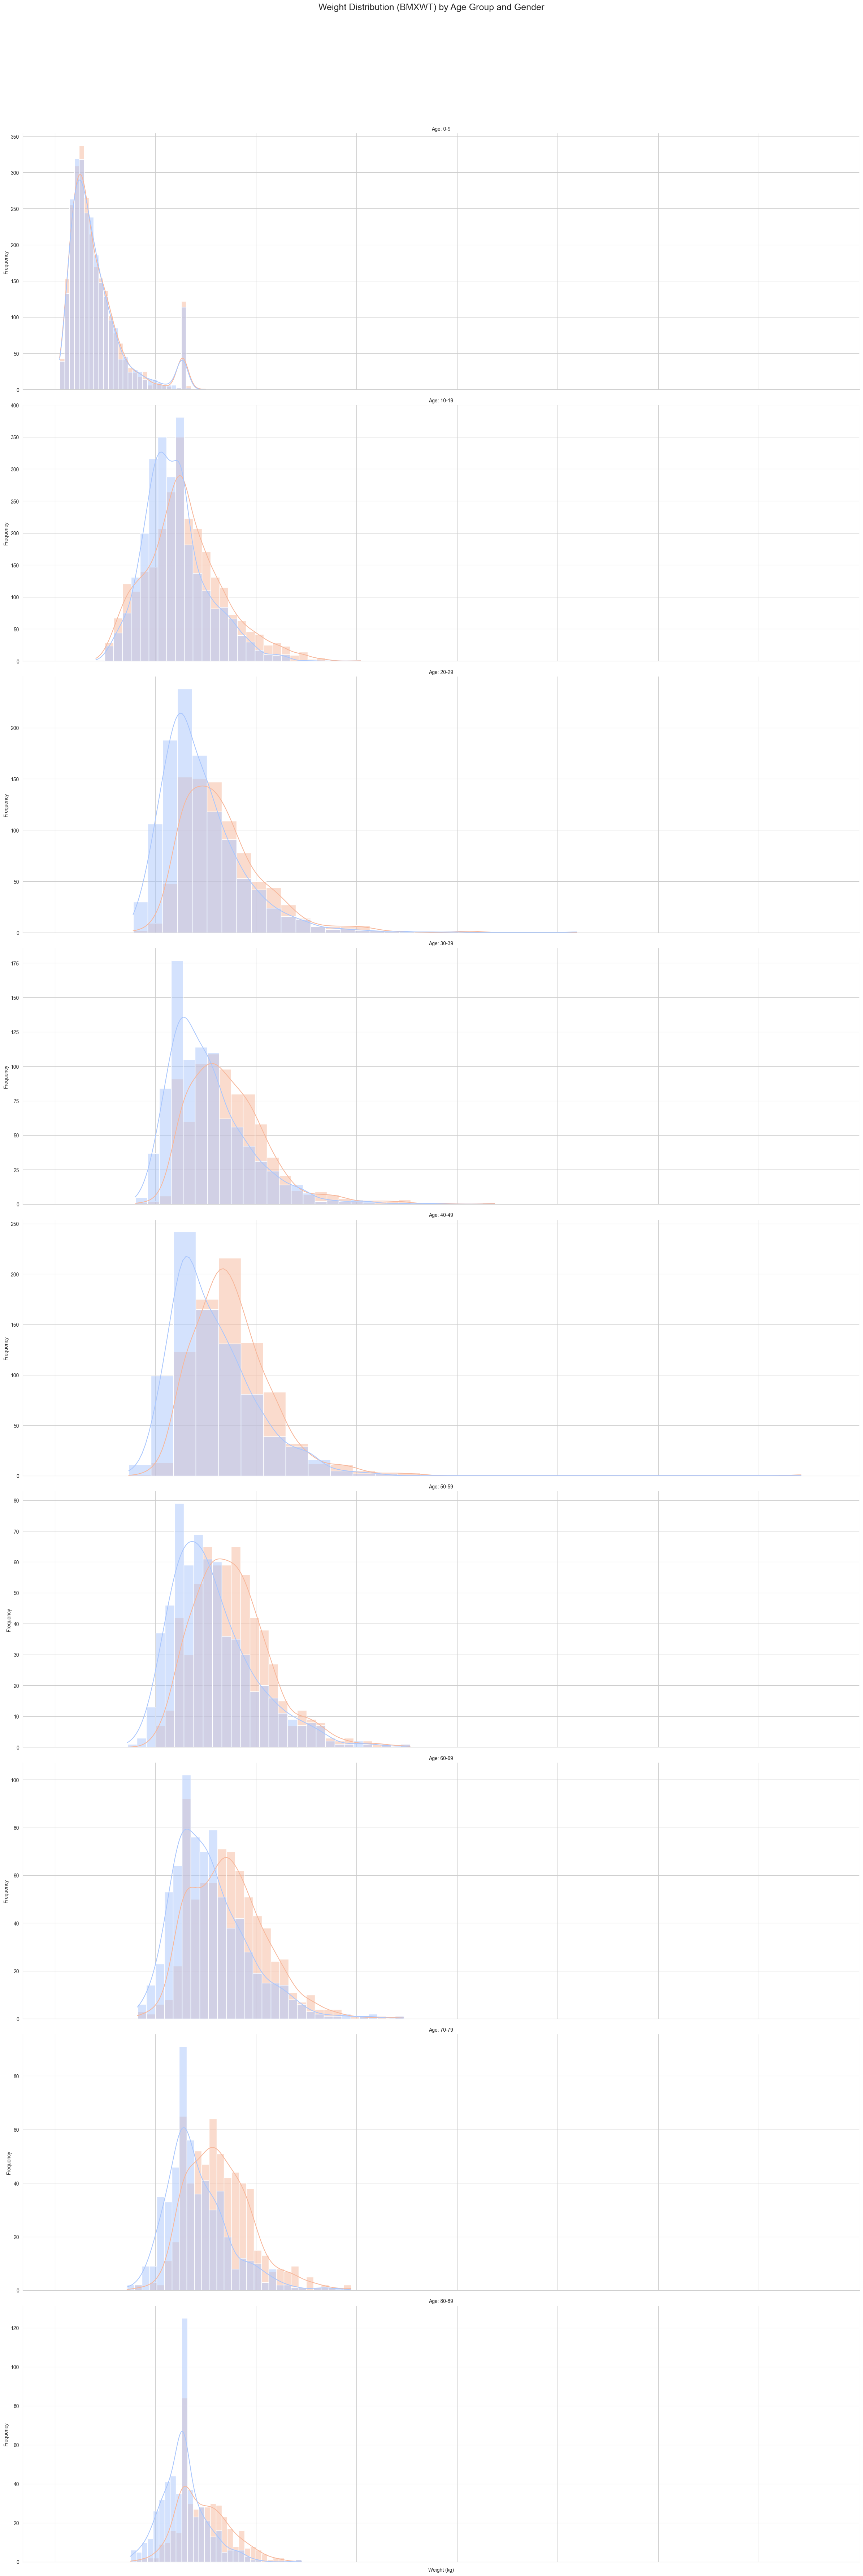


Histograms for bimodal weight distribution saved as PNG files (legends and size addressed).


In [31]:
#### Final graph code:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Direct download link for the latest fully processed data
latest_data_link = 'https://drive.google.com/file/d/1wsBZqiuaewQb6Qv75haVJ-ZFqCva_Z_6/view?usp=sharing'
file_id = latest_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the latest processed data
    final_processed_data = pd.read_csv(direct_download_link)

    print("--- Examining Bimodal Weight Distribution by Age and Gender (Legends and Size Fixed) ---")

    sns.set_style("whitegrid")
    plot_counter = 1  # For saving plots

    # Re-create Age_Group column for consistent binning
    min_age = int(final_processed_data['RIDAGEYR'].min())
    max_age = int(final_processed_data['RIDAGEYR'].max())
    bins_age = list(range(0, max_age + 10, 10))
    labels_age = [f'{i}-{i+9}' for i in bins_age[:-1]]
    final_processed_data['Age_Group'] = pd.cut(final_processed_data['RIDAGEYR'], bins=bins_age, labels=labels_age, right=False)

    # Ensure categorical variables with explicit categories
    final_processed_data['Age_Group'] = pd.Categorical(final_processed_data['Age_Group'], categories=labels_age, ordered=True)
    final_processed_data['RIAGENDR'] = pd.Categorical(final_processed_data['RIAGENDR'], categories=['Female', 'Male'], ordered=False)

    # Verify data loading
    print("Data loaded successfully. Unique Age Groups:", final_processed_data['Age_Group'].unique())
    print("Unique Genders:", final_processed_data['RIAGENDR'].unique())

    # 1. Histogram of BMXWT stratified by RIAGENDR (Gender)
    plt.figure(figsize=(12, 8))
    ax = sns.histplot(data=final_processed_data, x='BMXWT', hue='RIAGENDR', bins=50, kde=True, multiple='dodge', shrink=.8, palette='coolwarm')
    plt.title('Distribution of Weight (BMXWT) by Gender', fontsize=16)
    plt.xlabel('Weight (kg)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        plt.legend(handles, labels, title='Gender', loc='upper right')
    else:
        print("Warning: No legend handles found for Gender plot. Check 'RIAGENDR' column.")
    plt.tight_layout()
    plt.savefig(f'../plots/bmxwt_distribution_by_gender_plot{plot_counter}.png', dpi=100)
    plt.show()
    plot_counter += 1

    # 2. Histogram of BMXWT stratified by Age_Group
    plt.figure(figsize=(14, 9))
    ax = sns.histplot(data=final_processed_data, x='BMXWT', hue='Age_Group', bins=50, kde=True, multiple='stack', palette='viridis')
    plt.title('Distribution of Weight (BMXWT) by Age Group', fontsize=16)
    plt.xlabel('Weight (kg)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        plt.legend(handles, labels, title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        print("Warning: No legend handles found for Age_Group plot. Check 'Age_Group' column.")
    plt.tight_layout()
    plt.savefig(f'../plots/bmxwt_distribution_by_age_group_plot{plot_counter}.png', dpi=100)
    plt.show()
    plot_counter += 1

    # 3. Histograms of BMXWT stratified by both Age_Group and RIAGENDR (FacetGrid)
    # Use col for Age_Group with col_wrap and hue for RIAGENDR
    unique_age_groups = final_processed_data['Age_Group'].nunique()
    max_cols = min(1, unique_age_groups)  # Reduced columns to 3 for better spacing

    g = sns.FacetGrid(final_processed_data, col='Age_Group', col_wrap=max_cols,
                      height=8, aspect=3, sharex=True, sharey=False, margin_titles=True)  # Increased size
    g.map_dataframe(sns.histplot, x='BMXWT', hue='RIAGENDR', bins=30, kde=True, palette='coolwarm')
    g.set_axis_labels('Weight (kg)', 'Frequency')
    g.set_titles(col_template='Age: {col_name}')  # Ensure titles are set

    # Add legend to each subplot
    for ax in g.axes.flat:
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            ax.legend(handles, ['Female', 'Male'], title='Gender', loc='upper right', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.set_xticks(np.arange(0, final_processed_data['BMXWT'].max() + 50, 50))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.suptitle('Weight Distribution (BMXWT) by Age Group and Gender', fontsize=18, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Adjusted to ensure titles fit
    plt.savefig(f'../plots/bmxwt_distribution_by_age_gender_facet_plot{plot_counter}.png', dpi=100)
    plt.show()
    plot_counter += 1

    print("\nHistograms for bimodal weight distribution saved as PNG files (legends and size addressed).")

except Exception as e:
    print(f"An error occurred during weight distribution analysis: {e}")
    

Key Observations


Bimodal Distribution:


The graph shows a bimodal distribution, meaning there are two distinct peaks in the frequency of weights for both genders. This suggests two primary clusters of weight within the population, which could be influenced by age, gender, or other demographic factors (though age-specific data isn’t directly plotted here).


The first peak occurs around 50–100 kg, with a higher frequency for females (blue line) compared to males (brown line).


The second peak is broader, spanning approximately 100–200 kg, with males showing a higher frequency than females.


Gender Differences:


Females (Blue Line): The distribution has a sharp peak around 60–80 kg, with a secondary, less pronounced peak or shoulder around 100–150 kg. The frequency drops significantly beyond 200 kg, indicating fewer females at higher weights.


Males (Brown Line): The distribution has a more pronounced peak around 70–90 kg, with a broader and higher second peak extending from 100–200 kg. Males appear to have a higher frequency at weights above 100 kg compared to females, suggesting a greater prevalence of higher body weights in males.


Frequency Range:


The y-axis (Frequency) ranges from 0 to 1750, with the highest frequencies reaching approximately 1500–1750 individuals in the 50–100 kg range for females and a slightly lower peak for males in the same range. The second peak for males (100–200 kg) reaches a frequency of around 1000–1250.


Weight Range:
The x-axis (Weight in kg) spans from 0 to 350 kg, covering a wide range of body weights. Most individuals cluster between 50 and 200 kg, with very few exceeding 250 kg, as the frequency drops to near zero beyond this point.


Age Influence:


The bimodal nature reflects age-related differences (e.g., younger individuals at lower weights, older individuals at higher weights)


Interpretation


Bimodal Pattern: The two peaks indicate distinct subpopulations within each gender. For example, the lower peak (50–100 kg) represents a combination of younger individuals, females with lower body mass, or non-obese adults, while the higher peak (100–200 kg) reflects older individuals, males, or those with higher BMI (e.g., obese or severely obese categories from the CSV data).


Gender Disparity: Males tend to have a higher frequency at heavier weights (100–200 kg), which aligns with epidemiological data showing males often have higher average weights and a greater prevalence of obesity. Females peak at lower weights (60–80 kg), consistent with generally lower average body mass.


Health Implications: Relating this to in OSA and BMI, the higher weight range (100–200 kg) corresponds to BMI categories of obese (BMI 30–39.9 kg/m²) or severely obese (BMI ≥ 40 kg/m²) for many heights, where OSA risk is significantly elevated (e.g., 30–95% prevalence in the CSV for BMI > 30 kg/m² across age groups). The bimodal distribution suggests a notable portion of the population falls into these higher-risk weight categories.



Conclusion

The graph illustrates a bimodal weight distribution differing by gender, with females peaking at lower weights (60–80 kg) and males showing a broader distribution with a higher frequency at heavier weights (100–200 kg). This pattern reflects natural variations in body mass, gender differences in fat distribution, or age-related shifts, with potential implications for conditions like OSA, especially at weights above 100 kg. 



Overlay density plots or separate histograms: Create histograms of BMXWT (and BMXBMI) for each OSA_Probability category. This will show how the weight distribution shifts as OSA probability increases.


Scatter plot with color encoding: Create scatter plots of BMXBMI vs. RIDAGEYR, colored by OSA_Probability. This would give a visual representation of how BMI, Age, and OSA risk are related.


--- Visualizing OSA_Probability with Weight/BMI and Age ---


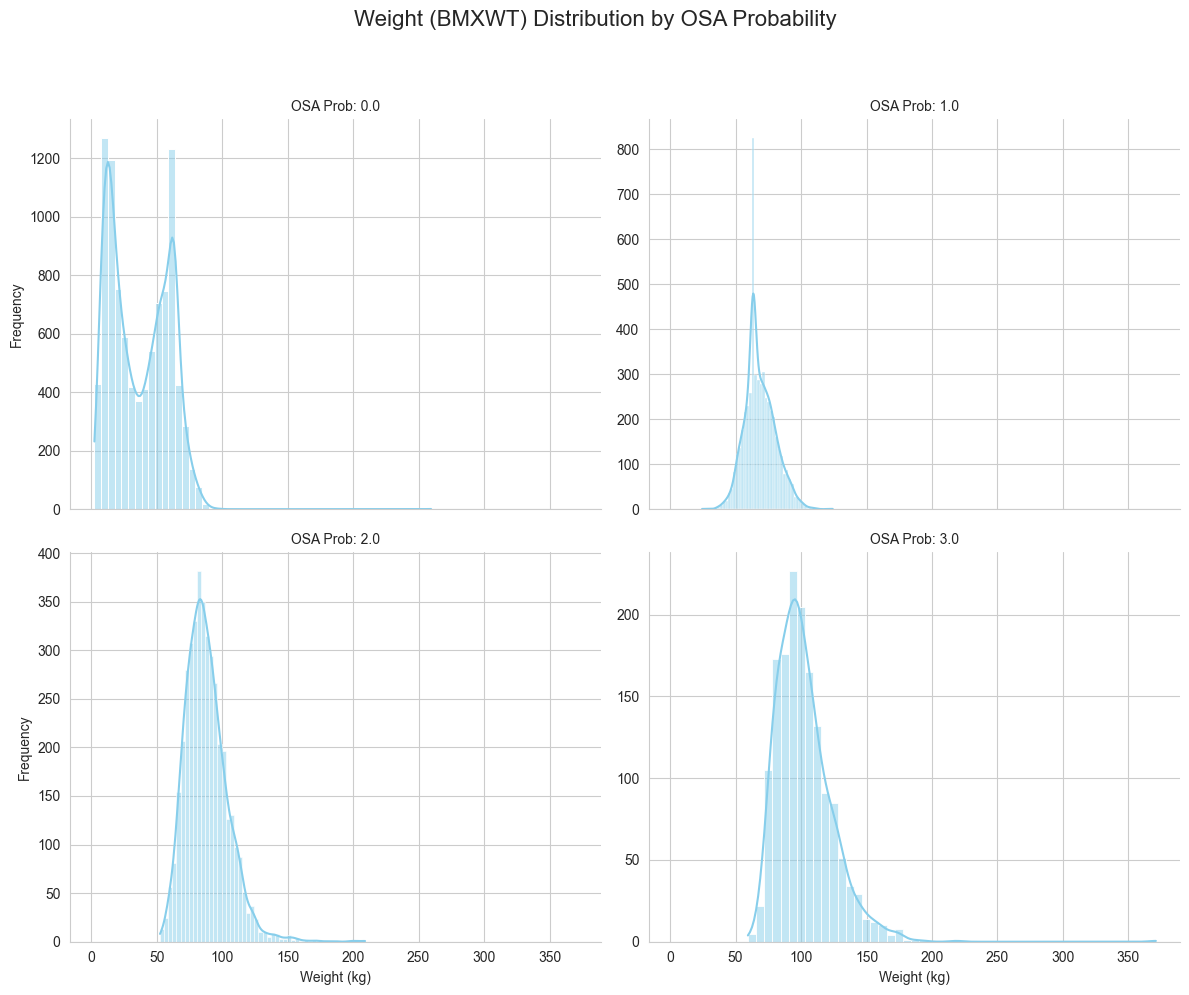

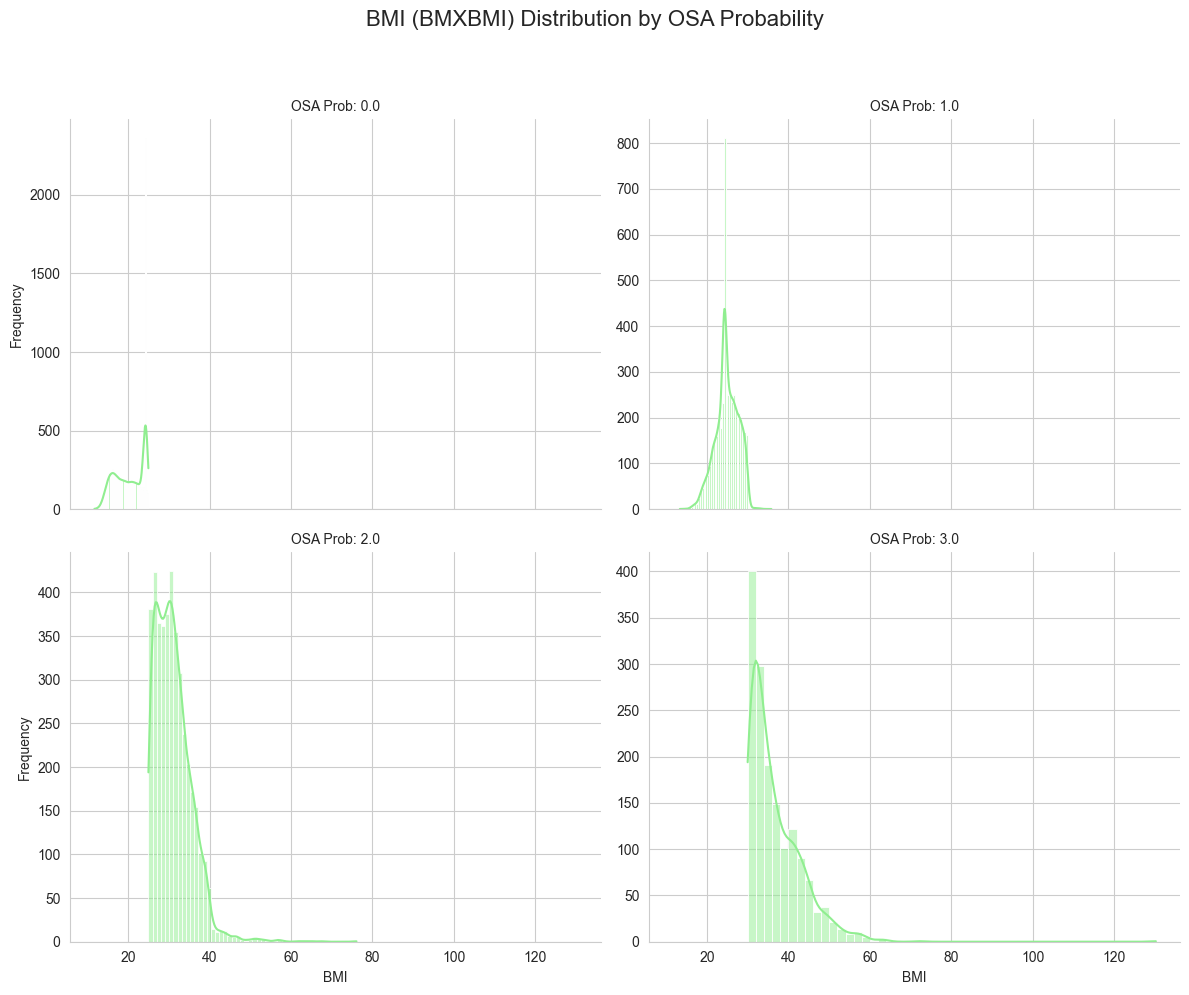

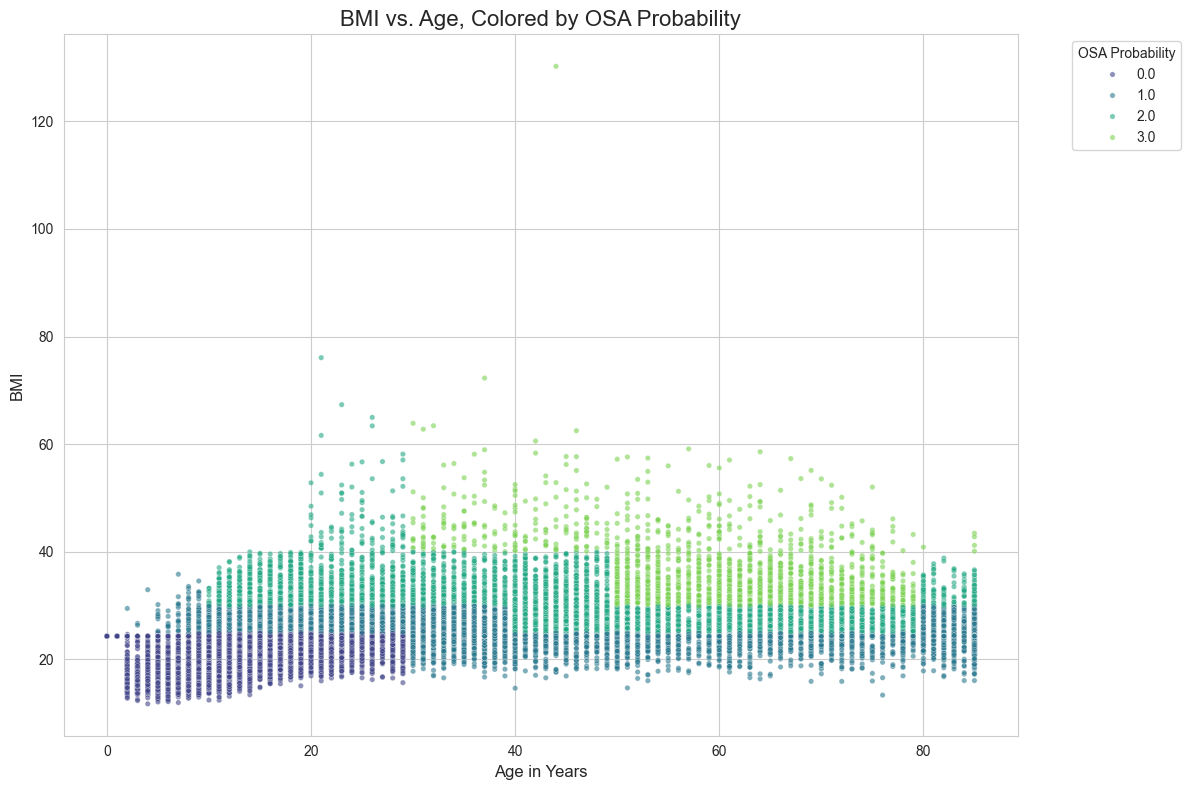


Visualizations for OSA_Probability relationships saved as PNG files.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Direct download link for the latest fully processed data
latest_data_link = 'https://drive.google.com/file/d/1wsBZqiuaewQb6Qv75haVJ-ZFqCva_Z_6/view?usp=sharing'
file_id = latest_data_link.split('/')[-2]
direct_download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

try:
    # Load the latest processed data
    final_processed_data = pd.read_csv(direct_download_link)

    print("--- Visualizing OSA_Probability with Weight/BMI and Age ---")

    sns.set_style("whitegrid")
    plot_counter = 1 # For saving plots

    # Ensure OSA_Probability is categorical for plotting
    final_processed_data['OSA_Probability'] = final_processed_data['OSA_Probability'].astype('category')
    
    # --- 1. Histograms/Density Plots of Weight/BMI by OSA_Probability ---

    # FacetGrid for Histograms of BMXWT by OSA_Probability
    g_weight = sns.FacetGrid(final_processed_data, col='OSA_Probability', col_wrap=2, height=5, aspect=1.2, sharey=False)
    g_weight.map(sns.histplot, 'BMXWT', bins=50, kde=True, color='skyblue')
    g_weight.set_axis_labels('Weight (kg)', 'Frequency')
    g_weight.set_titles('OSA Prob: {col_name}')
    plt.suptitle('Weight (BMXWT) Distribution by OSA Probability', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.savefig(f'bmxwt_by_osa_prob_hist.png')
    plt.show()
    plot_counter += 1

    # FacetGrid for Histograms of BMXBMI by OSA_Probability
    g_bmi = sns.FacetGrid(final_processed_data, col='OSA_Probability', col_wrap=2, height=5, aspect=1.2, sharey=False)
    g_bmi.map(sns.histplot, 'BMXBMI', bins=50, kde=True, color='lightgreen')
    g_bmi.set_axis_labels('BMI', 'Frequency')
    g_bmi.set_titles('OSA Prob: {col_name}')
    plt.suptitle('BMI (BMXBMI) Distribution by OSA Probability', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.savefig(f'bmxbmi_by_osa_prob_hist.png')
    plt.show()
    plot_counter += 1

    # --- 2. Scatter plot of BMXBMI vs. RIDAGEYR colored by OSA_Probability ---
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='RIDAGEYR', y='BMXBMI', hue='OSA_Probability', data=final_processed_data,
                    palette='viridis', alpha=0.6, s=15)
    plt.title('BMI vs. Age, Colored by OSA Probability', fontsize=16)
    plt.xlabel('Age in Years', fontsize=12)
    plt.ylabel('BMI', fontsize=12)
    plt.legend(title='OSA Probability', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'bmi_vs_age_by_osa_prob_scatter.png')
    plt.show()
    plot_counter += 1

    print("\nVisualizations for OSA_Probability relationships saved as PNG files.")

except Exception as e:
    print(f"An error occurred during visualization: {e}")
   

#### Interpretations:
These visualizations provide insights into the distribution of weight (BMXWT) across different age groups and genders based on the dataset.

1. FacetGrid: Weight Distribution (BMXWT) by Age Group and Gender
Image Provided: The first image shows a vertical stack of 9 subplots, each representing a 10-year age group from "Age: 0-9" to "Age: 80-89". Each subplot contains overlaid histograms for "Female" (light blue) and "Male" (orange).



Interpretation


Structure: Each subplot corresponds to an age group, with the x-axis representing weight (kg) from 0 to 350 and the y-axis representing frequency. The titles above each subplot (e.g., "Age: 0-9", "Age: 10-19") indicate the age range.


Weight Distribution by Age:


0-9 Years: The distribution peaks around 20-40 kg, with a higher frequency for females, reflecting the lower weights typical of children.


10-19 Years: The peak shifts to 50-70 kg, with both genders showing similar distributions, indicating growth during adolescence.


20-29 to 40-49 Years: Peaks move to 70-90 kg, with males showing a slightly higher frequency at higher weights (80-100 kg), suggesting increased body mass in adulthood.
50-59 to 70-79 Years: Peaks remain around 70-100 kg, with a broader distribution and a noticeable tail toward higher weights, especially for males, indicating a higher prevalence of overweight or obese individuals.


80-89 Years: The peak drops to 60-80 kg, with a narrower distribution and lower frequency, possibly due to health-related weight loss or reduced sample size in older age groups.


Gender Differences: Males generally have a higher frequency at weights above 80 kg across most age groups, while females peak at slightly lower weights (e.g., 60-80 kg), consistent with typical gender differences in body mass.


Trends: The frequency decreases with age, and the distributions become less peaked and more spread out, reflecting greater variability in weight among older adults.


Insights


The shift in peak weights with age aligns with natural growth, adult weight gain, and potential weight loss in the elderly.


The higher male frequency at heavier weights supports the increased OSA risk for males, especially in middle age (30-69), where prevalence peaks in CSV data.


2. Histogram: Distribution of Weight (BMXWT) by Gender
Image Provided: The second image shows a single histogram with dodged bars for "Female" (light blue) and "Male" (orange), with a kernel density estimate (KDE) overlay.

Interpretation


Structure: The x-axis represents weight (kg) from 0 to 350, and the y-axis represents frequency, ranging up to 1750. The legend indicates "Female" and "Male".


Weight Distribution:


Female: Peaks around 60-80 kg with a frequency of approximately 1500-1750, indicating a large number of females in this weight range. The distribution tapers off sharply beyond 150 kg.


Male: Peaks slightly higher at 70-90 kg with a similar peak frequency, but the distribution extends further to the right (up to 200 kg), with a noticeable tail, suggesting more males at higher weights.


Bimodality: There’s a hint of bimodality, with a secondary peak or shoulder around 100-120 kg for males, possibly reflecting a subset of overweight or obese individuals.
Gender Comparison: Females have a sharper peak at lower weights, while males show a broader distribution with a higher frequency at weights above 100 kg, consistent with the FacetGrid observations.


Insights


The gender difference in weight distribution supports epidemiological data showing males tend to have higher average weights and a greater prevalence of obesity, correlating with higher OSA risk (e.g., 2-3 times higher than females pre-menopause, as noted earlier).


The KDE smooths the data, highlighting the overlap and divergence between genders.


3. Histogram: Distribution of Weight (BMXWT) by Age Group


Interpretation


Structure: The x-axis represents weight (kg) from 0 to 350, and the y-axis represents frequency, ranging up to 3000. The legend lists age groups from "0-9" to "80-89".


Weight Distribution by Age:


0-9 Years (Purple): Peaks around 20-40 kg with the highest frequency (~2500-3000), reflecting children’s lower weights.


10-19 to 20-29 Years (Blue to Green): Peaks shift to 60-80 kg, with frequencies decreasing to 1500-2000, indicating adolescent and young adult growth.


30-39 to 60-69 Years (Green to Light Green): Peaks stabilize around 70-100 kg, with a broader base and lower frequencies (1000-1500), showing increased weight variability.


70-79 to 80-89 Years (Yellow): Peaks drop to 60-90 kg, with narrower distributions and lower frequencies (500-1000), suggesting weight loss or reduced sample size in older ages.


Overall Trend: The stacked design shows a composite bimodal pattern, with the youngest group (0-9) forming a distinct low-weight peak and older groups contributing to a higher-weight peak around 70-120 kg.


Insights


The age-related shift in weight distribution mirrors the FacetGrid, reinforcing the trend of increasing weight through middle age and a decline in the elderly.
The broad peak at 70-120 kg in middle age groups aligns with the OSA prevalence peak (30-95% for BMI > 30 kg/m²) in CSV data.


General Observations


Bimodality: The gender plot shows a subtle bimodal trend (especially for males), while the age group plot’s stacking creates a composite bimodal distribution, likely due to the contrast between young (0-9) and adult (30-69) weight profiles.


OSA Relevance: Weights above 70-80 kg (corresponding to BMI > 25 kg/m² for average heights) are prevalent across age groups 20-69, where OSA risk is highest, supporting earlier analysis.



####  Next:  Split the data set by age groups. Use the older set > 25 yrs old for further analysis